# Data Visulization with ggplot2
#### libraries
library(tidyverse)

library(ggplot2)

library(gridExtra)

library(ggthemes)

#### ggplot template: 
ggplot+
grom_func(mapping=aes())

#### aesthetic 
aestheic: color, fill, size, shape, alpha, linetype, group

(a) map an existing variable to a aesthetic: associate variable name with aesthetic name within aes()

(b) set aesthetic manully: set aesthetic by name with geom_func but outside aes.

#### facet 
(a) facet the plot by one discrete variables: 

facet_wrap(~discrete_var, nrow)

(b) facet the plot by a combination of two discrete variabels:

facet_grid(discrete_var1 ~ discrete_var2)

#### geom: geometrical objects
geom_point()

geom_line()

geom_smooth()

geom_jitter()

geom_bar(): bar chart

(a) display multiple objects in groups: set group aesthetic to a categorical variable.

(b) display multiple geoms in the same plot: use sign "+"

#### position adjustment
Adjust position by setting position argument in geom_func.

bar chart:     position=c("stacking","identity","dodge","fill")

scatter plot:  position="jitter"

#### coordinate system

coord_flip(): switch x and y axes

coord_quickmap(): Set the aspect ratio correctly for maps.

coord_polar(): Polar coordinates (convert barchart to coxcomb chart)


#### modify axis, legend, and plot labels
labs(x, y, title, subtitle, caption)

xlab(label)

ylab(label)

ggtitle(label, subtitle=NULL)

xlim(0,1)

ylim(0,1)

#### modify individual component of a theme
theme(

text=element_text(size=12),  # set text size 

axis.text.x = element_text(algle=90, hjust=1), # set text angle

lengend.position = c("none","left","right"),    # set legend position

aspect.ratio=1

) 

## Load package ggplot2

In [1]:
# load pacakge ggplot2 
library(ggplot2)
library(gridExtra)

Warning message:
“package ‘ggplot2’ was built under R version 3.2.5”

## Read in Data
mpg is a data frame in pacakge ggplot2. 

displ is a car's engine size

hwy is a car's fuel efficiency on high way.

class is a car's type, such as compact, midsize and SUV.

What does the relationship between engine size and fuel efficiency look like? 

The plot shows a negative relationship between engine size and fuel effiency. Cars with big engines use more fuel.

In [2]:
# mpg data frame in ggplot2
data(mpg)
# To learn more about mpg in ggplot2
help(mpg)
# To learn the structure of the data frame
str(mpg)
# Read first several lines of mpg to take a glimps of the data
head(mpg)
# basic statistics
summary(mpg)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	234 obs. of  11 variables:
 $ manufacturer: chr  "audi" "audi" "audi" "audi" ...
 $ model       : chr  "a4" "a4" "a4" "a4" ...
 $ displ       : num  1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int  1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int  4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr  "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr  "f" "f" "f" "f" ...
 $ cty         : int  18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int  29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr  "p" "p" "p" "p" ...
 $ class       : chr  "compact" "compact" "compact" "compact" ...


manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


 manufacturer          model               displ            year     
 Length:234         Length:234         Min.   :1.600   Min.   :1999  
 Class :character   Class :character   1st Qu.:2.400   1st Qu.:1999  
 Mode  :character   Mode  :character   Median :3.300   Median :2004  
                                       Mean   :3.472   Mean   :2004  
                                       3rd Qu.:4.600   3rd Qu.:2008  
                                       Max.   :7.000   Max.   :2008  
      cyl           trans               drv                 cty       
 Min.   :4.000   Length:234         Length:234         Min.   : 9.00  
 1st Qu.:4.000   Class :character   Class :character   1st Qu.:14.00  
 Median :6.000   Mode  :character   Mode  :character   Median :17.00  
 Mean   :5.889                                         Mean   :16.86  
 3rd Qu.:8.000                                         3rd Qu.:19.00  
 Max.   :8.000                                         Max.   :35.00  
      hwy    

## Create a ggplot

### Template:
ggplot(data=DATA)+

GEOM_FUNCTION(mapping=aex(MAPPINGS))

1. Function ggplot(DATA) create a coordinate system that you can add layers to. DATA is the dataset to use in the graph.

2. Function geom_point(mapping=aes(x,y)) adds a layer of points to your plot, which create a scatter plot.  The mapping argument is paired with aes. x and y in aes specify which variables to map to the x-axix and y-axis.

3. The "+" sign in the template has to come at the end of the line, not the start.



# template
ggplot(data = DATA) +

GEOM_FUNCTION(

mapping = aes(MAPPINGS),

stat = STAT,

position = POSITION

) +

COORDINATE_FUNCTION +

FACET_FUNCTION

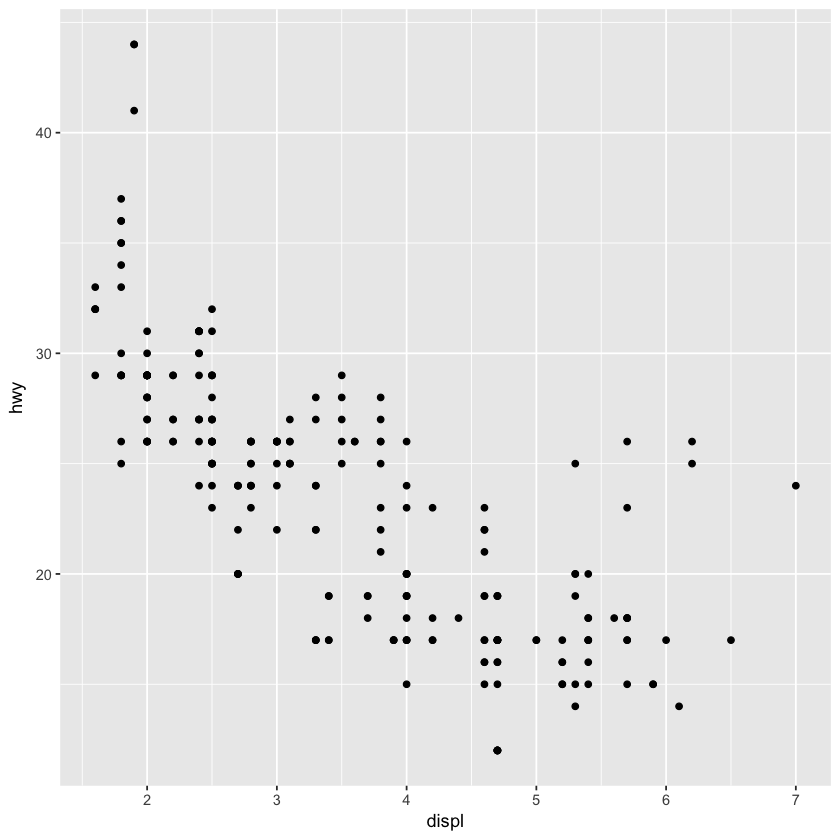

In [3]:
# Create a scatterlot of hwy versus displ 
ggplot(data=mpg) +
geom_point(mapping=aes(x=displ, y=hwy))

### aesthetic mappings:

An aesthetic is a visual property of the objects in your plot. Aesthetics includes things like size, shape, color. You can display objects (points, lines) differently by changing the "levels" of its aesthetic properties.

1. To map an aesthetic to a variable in the dataframe, associate the name of the aesthtic to the name of the variable inside aes(). This is one way to add additional varaibles. 
#### color,  size,  shape,  alpha, linetype, group

2. To set an aesthetic manually, set the aesthetic by name as an argument of your geom function (outside of aes()). 
#### color: character string
#### size: number in mm
#### shape: number 0-24.  (hollow shape: 0-14, solid shape: 15-18, filled shapes: 21-24).

Note: For shapes, hollow shapes have a border deternmined by color, solid shapes are filled with color, filled shapes have a border determined by color and filled with fill.

Note: ggplot2 will only use six shapes at a time. By default, additional groups will go unplotted. 



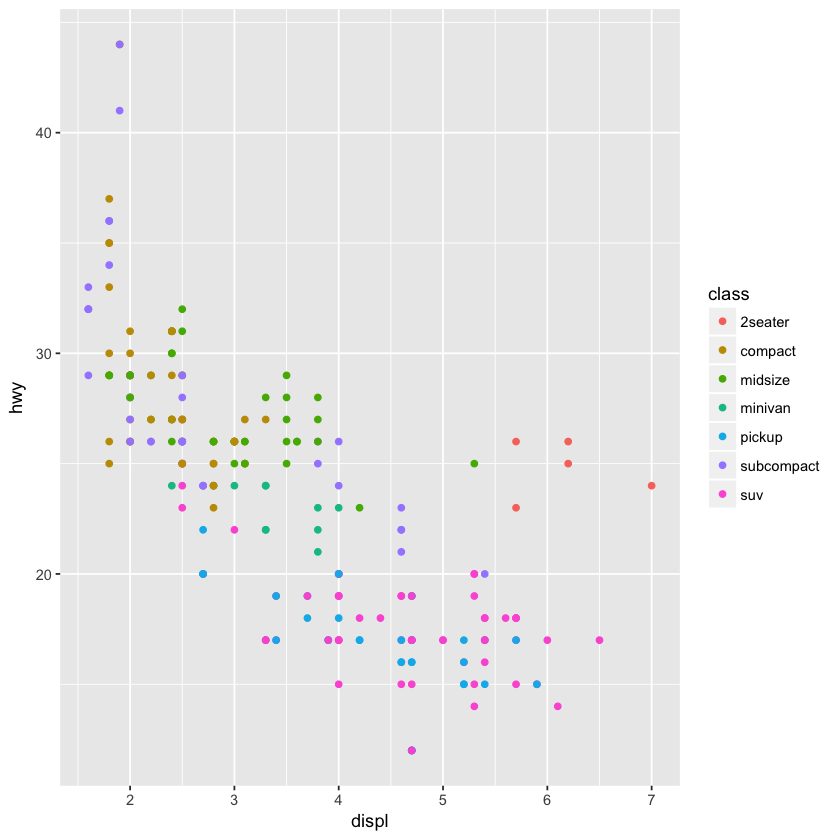

In [4]:
# map color of your points to variable class 
# color can  reveal the class of each car
ggplot(data=mpg)+
geom_point(mapping=aes(x=displ, y=hwy, color=class))

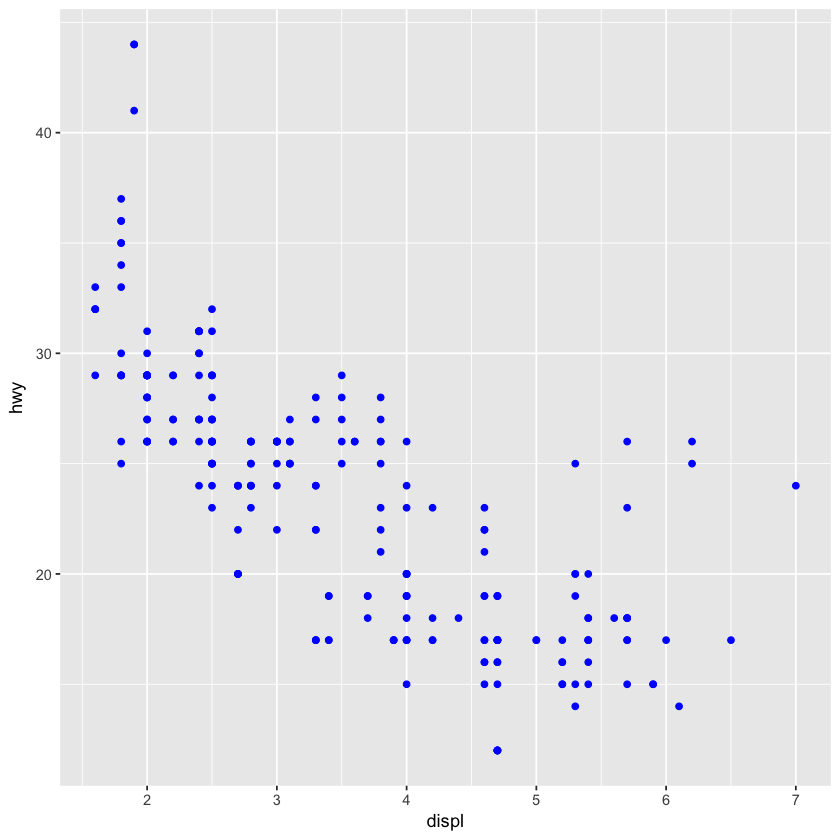

In [5]:
# set aesthetic properties manually
# plot all dots in blue
ggplot(data=mpg)+
geom_point(mapping=aes(x=displ, y=hwy), color="blue")

### Facets (Subplots)
Another way to add addtional variables (especially categorical variables) to ggplot is to split your plot into facets, subplots that each display one subset of the data.

1. facet_wrap(~ discrete_var, nrow): To facet your plot by a single variale. The first argument should be a formula, and variable should be discrete.

2. facet_grid(): To facet your plot on the combination of two variables.The first argument should be a formula, and two discrete variable should be separated by ~. 

Note: facet_grid(x~.) or facet_grid(.~x) is similar to facet_wrap(~x, nrow=1)

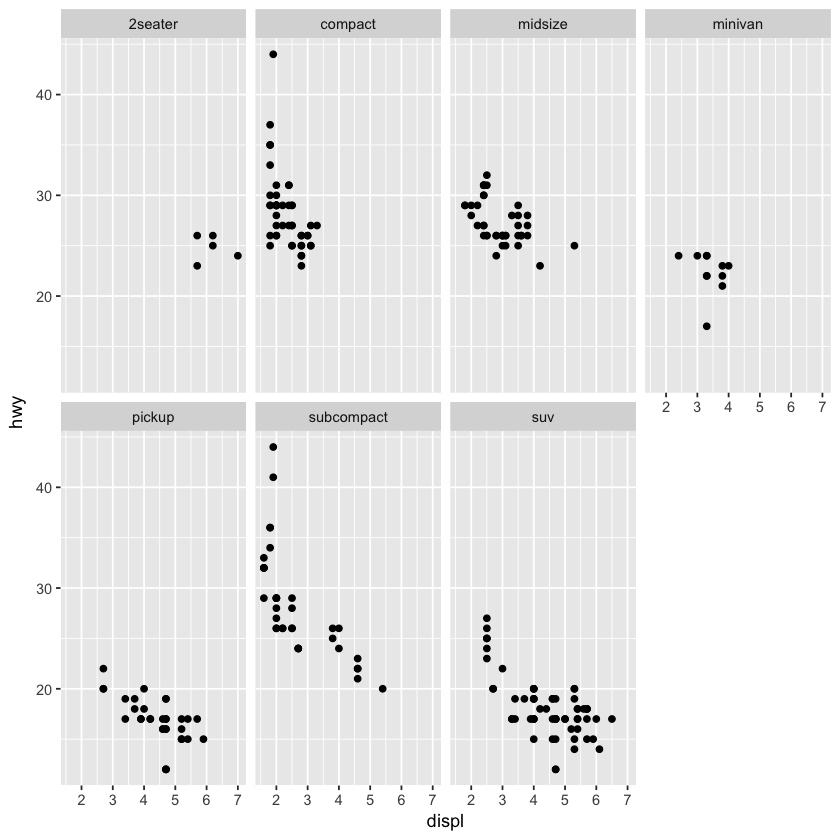

In [6]:
# facet_wrap: facet your plot by a single variable
ggplot(data=mpg)+
geom_point(mapping=aes(x=displ, y=hwy))+
facet_wrap(~class, nrow=2)

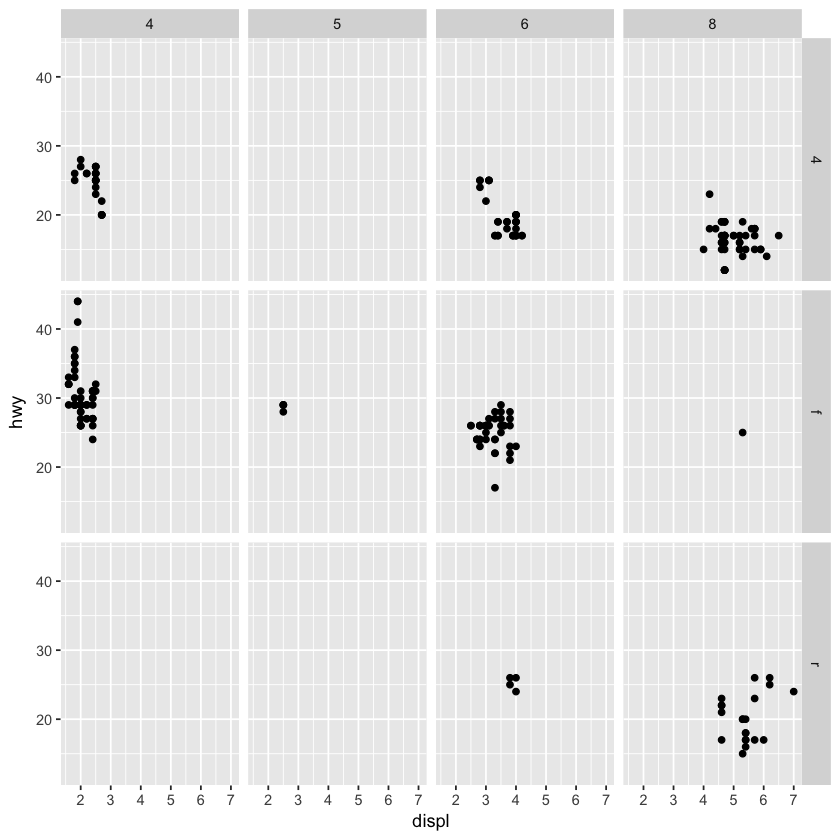

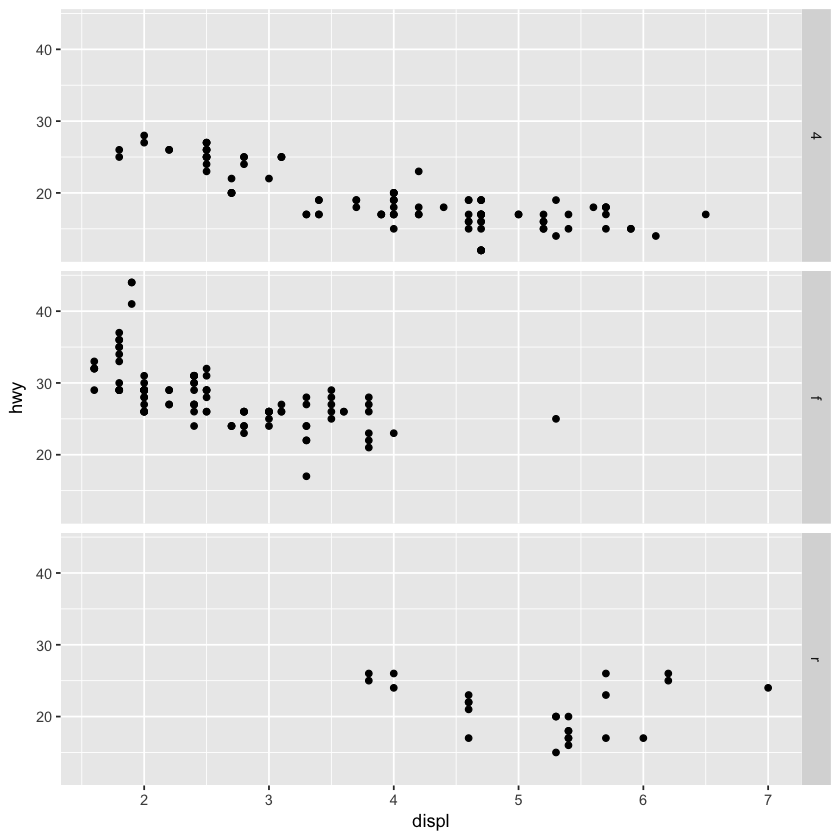

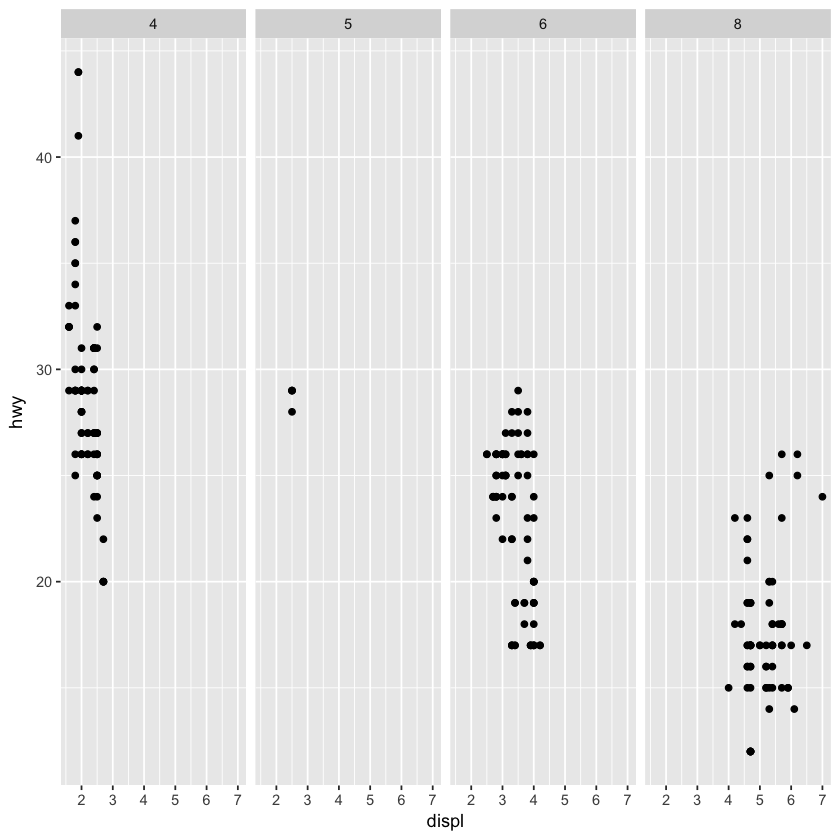

In [7]:
# facet_grid: facet your plot by a combination of two variables
ggplot(data=mpg)+
geom_point(mapping=aes(x=displ, y=hwy))+
facet_grid(drv~cyl)

ggplot(data = mpg) +
geom_point(mapping = aes(x = displ, y = hwy)) +
facet_grid(drv ~ .)

ggplot(data = mpg) +
geom_point(mapping = aes(x = displ, y = hwy)) +
facet_grid(.~cyl)

### Geometric Objects

A geom is the geometrical object that a plot uses to represent data.There are over 30 geoms in ggplot2. People often describe plots by the type of geom. Ex: bar charts use bar geoms, line charts use line geoms, boxplots use boxplot geoms, scatterplots use point geom.


1. To change the geom in your plot, change the geom function that you add to ggplot().
#### geom_point,   geom_line,   goem_smooth

2. Every goem function takes a mapping argument. But not every aesthetic works with every geom. Ex: you cannot set shape for a line, or linetype for points.

3. Many geoms use a single object (a single line) to display all the data. For these goems, you can set the group aesthetic to a categorical variable to display multiple object. ggplot2 will automaticllay group observations into different catogeries and display a seperate object for each category, whenever you set an aesthetic to a discete variable. 

4. To display multiple geoms in the same plot, add multiple geo functions to ggplot() using sign "+". However, this will introduce some duplication. We can add argument mapping in ggplot and treat it as global mappings that applies to each geom functions. If you place mappings in a geom function, ggplot2 will treat them as local mappings for the layer, and it can extend or overwrite the global mappings for that layer. This makes it possible to display different aesthetics in different layers. The idea is the same to data argument. 

`geom_smooth()` using method = 'loess'


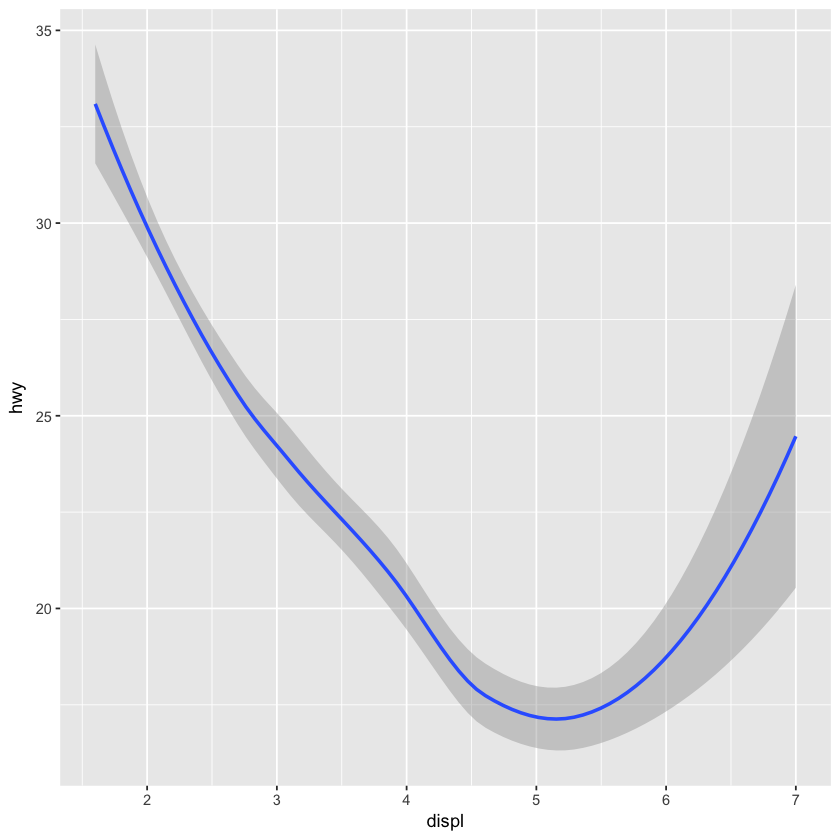

In [8]:
# Example 1
ggplot(data=mpg)+
geom_smooth(mapping=aes(x=displ, y=hwy))

`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'


`geom_smooth()` using method = 'loess'


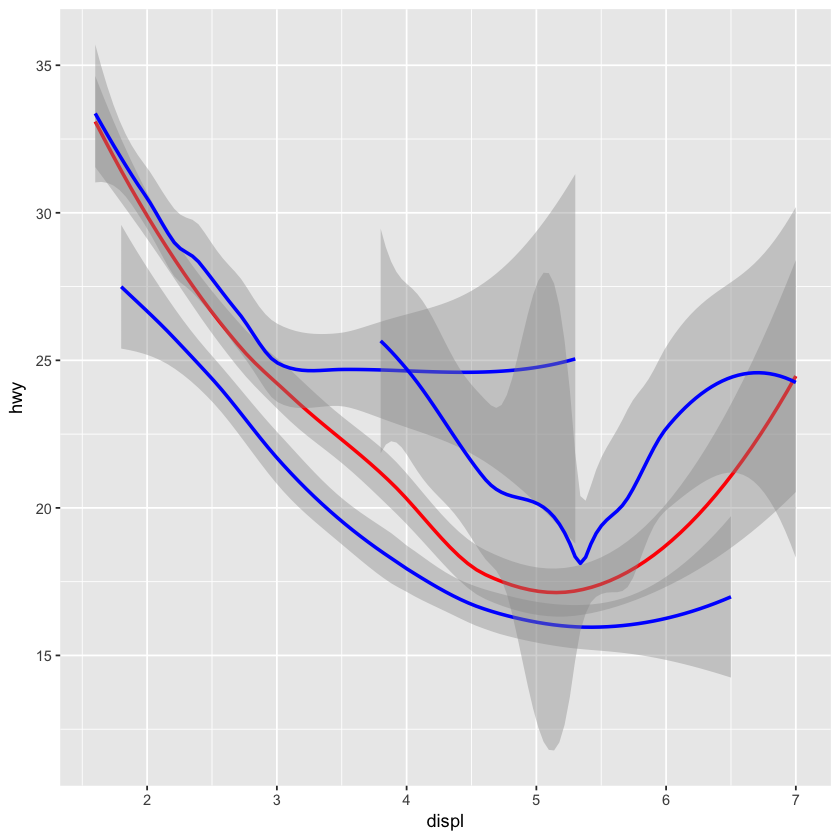

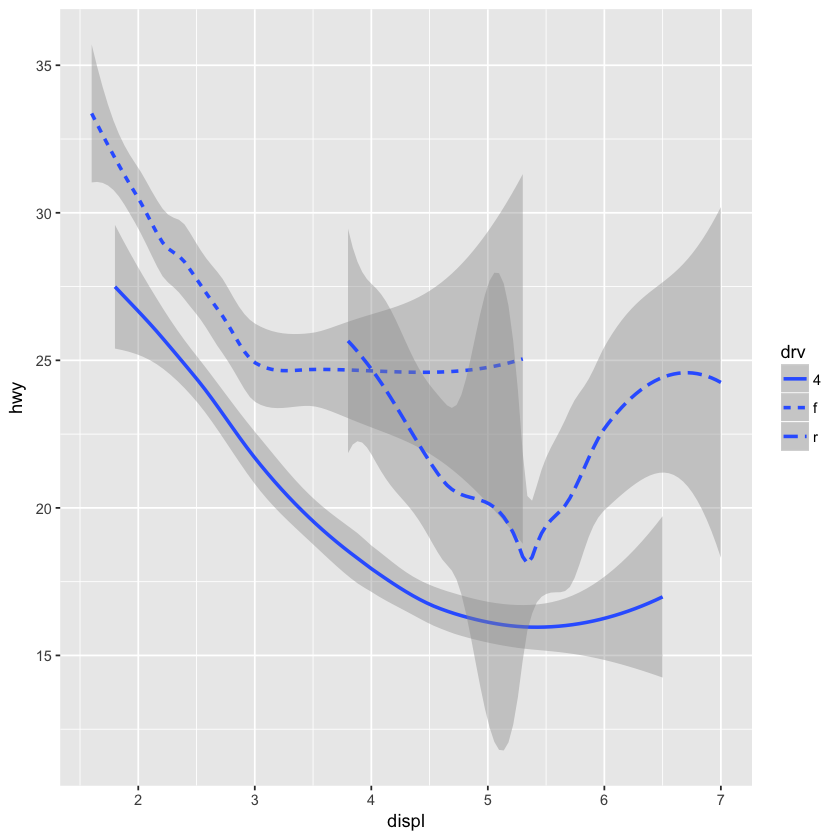

In [9]:
# Example 2
ggplot(data=mpg)+
# display single line for entire data
geom_smooth(mapping=aes(x=displ, y=hwy), color="red")+ 
# display each line for each group
geom_smooth(mapping=aes(x=displ, y=hwy, group=drv), color="blue")  


# geom_smooth draw differnt lines with different line types
# seperate the cars into groups based on drv
# each line describe one group
ggplot(data=mpg)+
geom_smooth(mapping=aes(x=displ, y=hwy, linetype=drv))

`geom_smooth()` using method = 'loess'


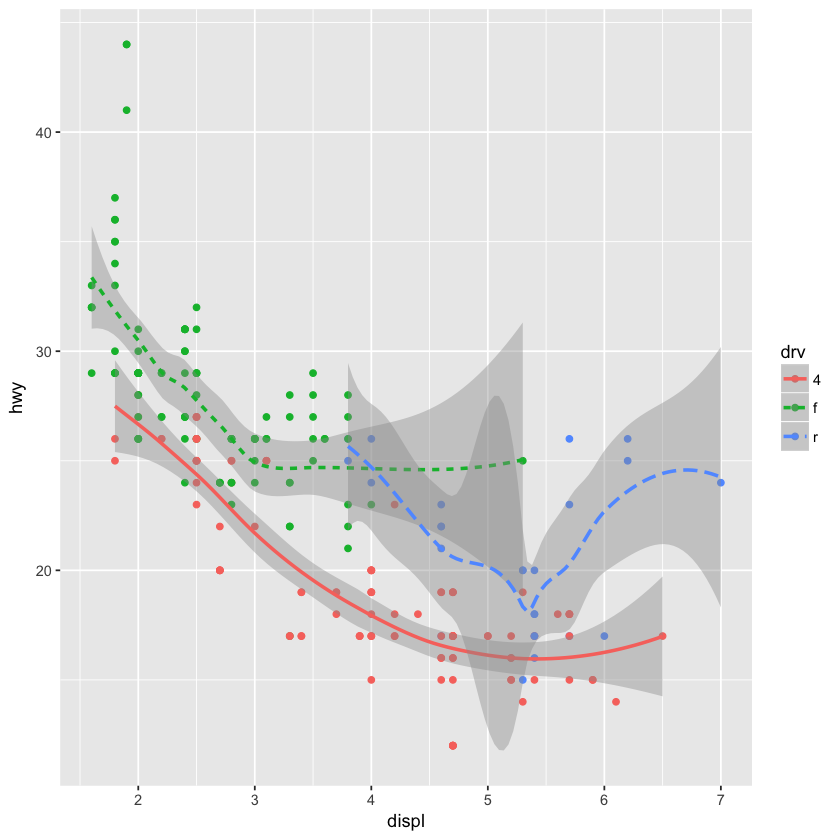

In [10]:
# Example: Display two geoms in the same graph
# Duplicate aesthetics in geoms
ggplot(data=mpg)+
geom_point(mapping=aes(x=displ, y=hwy, color=drv))+
geom_smooth(mapping=aes(x=displ, y=hwy, linetype=drv, color=drv))

`geom_smooth()` using method = 'loess'


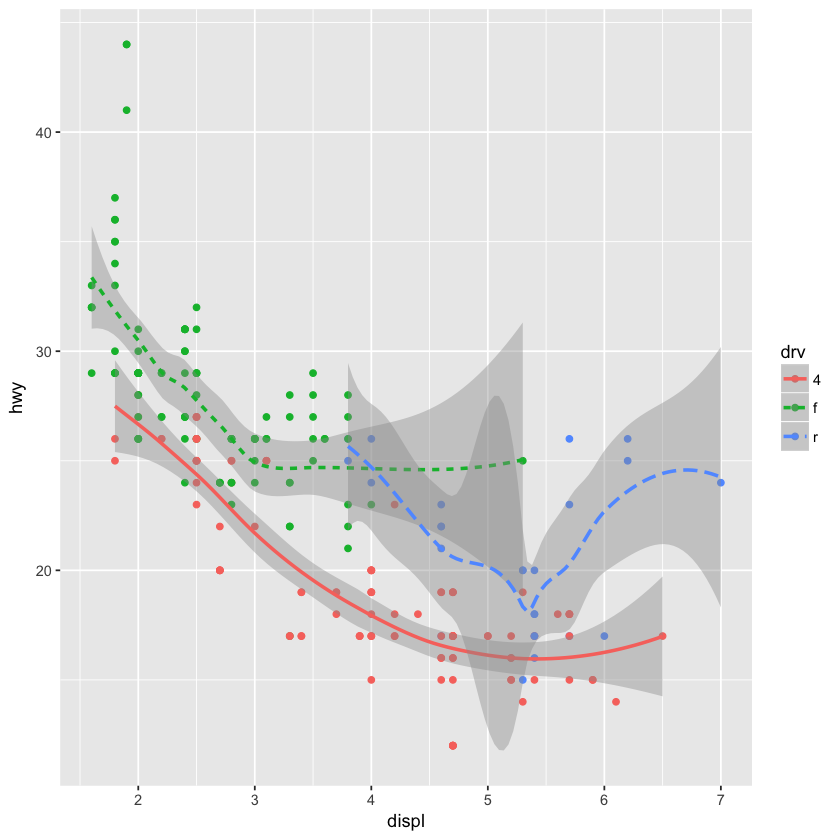

In [11]:
# Example: Display two geoms in the same graph
# global and local mappings
ggplot(data=mpg, mapping=aes(x=displ, y=hwy, color=drv)) +
geom_point() +
geom_smooth(mapping=aes(linetype=drv))

In [12]:
# Example: Display two geoms in the same graph
# global data and local data
library(tidyverse)
mpg = rename(mpg, CLASS=class)

ggplot(data=mpg, mapping=aes(x=displ, y=hwy)) +
geom_point(mapping=aes(color=class)) +
geom_smooth(data=filter(mpg, CLASS == "compact"), se=FALSE)

Warning message:
“package ‘tidyverse’ was built under R version 3.2.5”Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Warning message:
“package ‘tibble’ was built under R version 3.2.5”Warning message:
“package ‘tidyr’ was built under R version 3.2.5”Warning message:
“package ‘readr’ was built under R version 3.2.5”Warning message:
“package ‘purrr’ was built under R version 3.2.5”Warning message:
“package ‘dplyr’ was built under R version 3.2.5”Conflicts with tidy packages ---------------------------------------------------
combine(): dplyr, gridExtra
filter():  dplyr, stats
lag():     dplyr, stats
Warning message:
“package ‘bindrcpp’ was built under R version 3.2.5”Don't know how to automatically pick scale for object of type function. Defaulting to continuous.


ERROR: Error in file(con, "rb"): cannot open the connection


plot without title

`geom_smooth()` using method = 'loess'


`geom_smooth()` using method = 'loess'


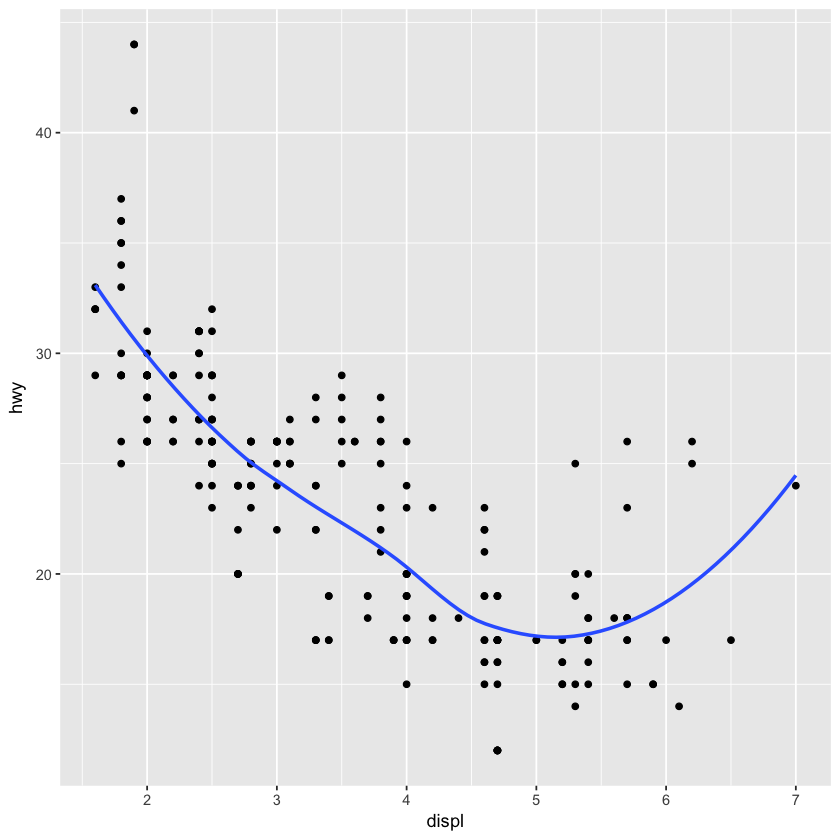

`geom_smooth()` using method = 'loess'


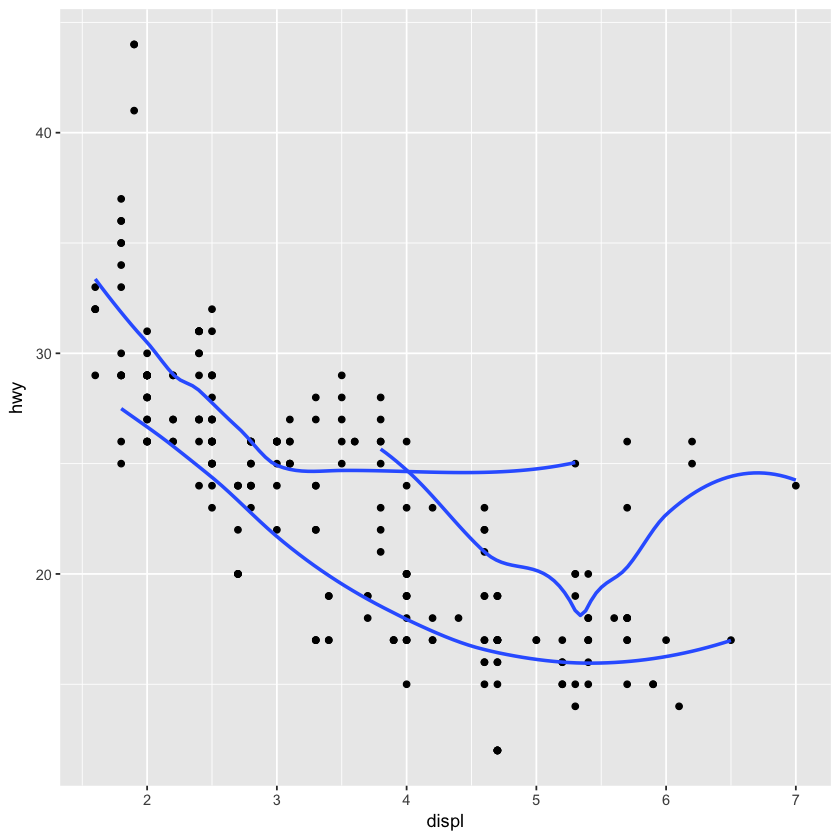

`geom_smooth()` using method = 'loess'


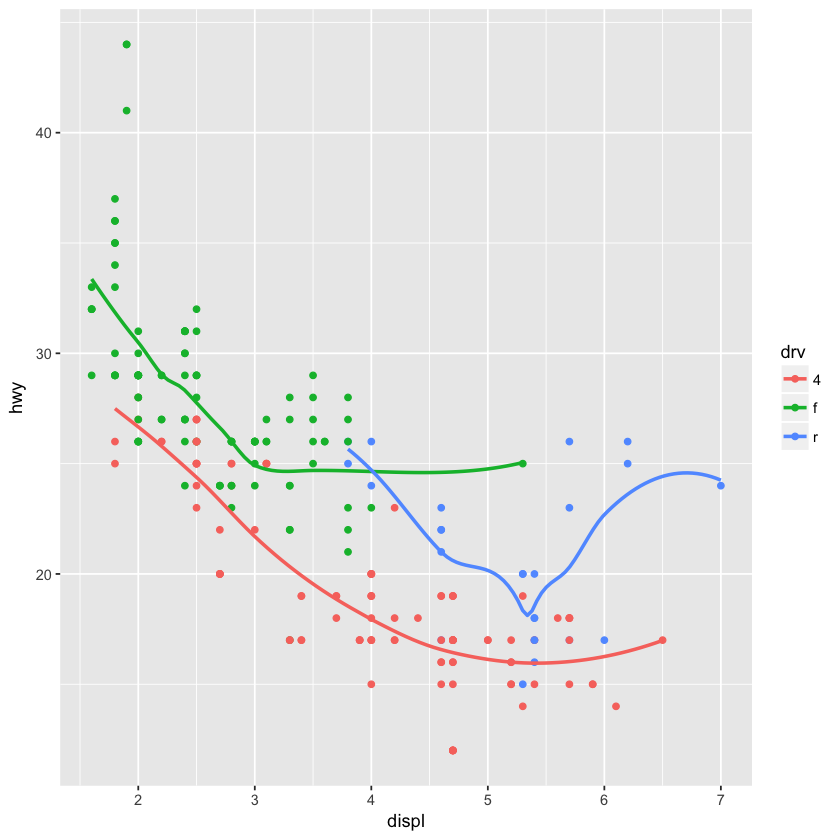

`geom_smooth()` using method = 'loess'


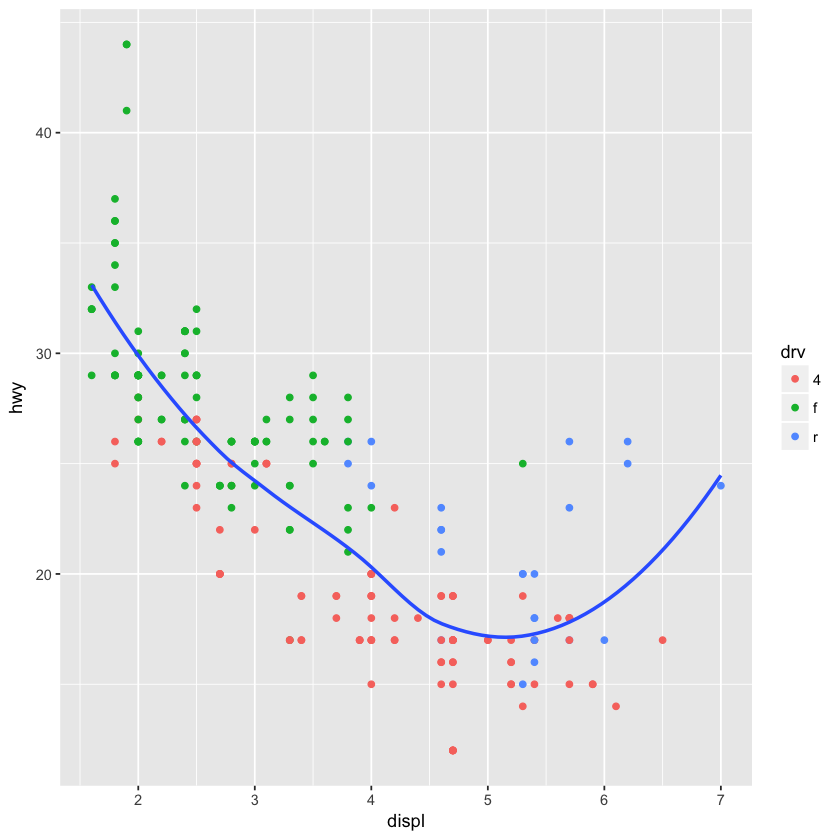

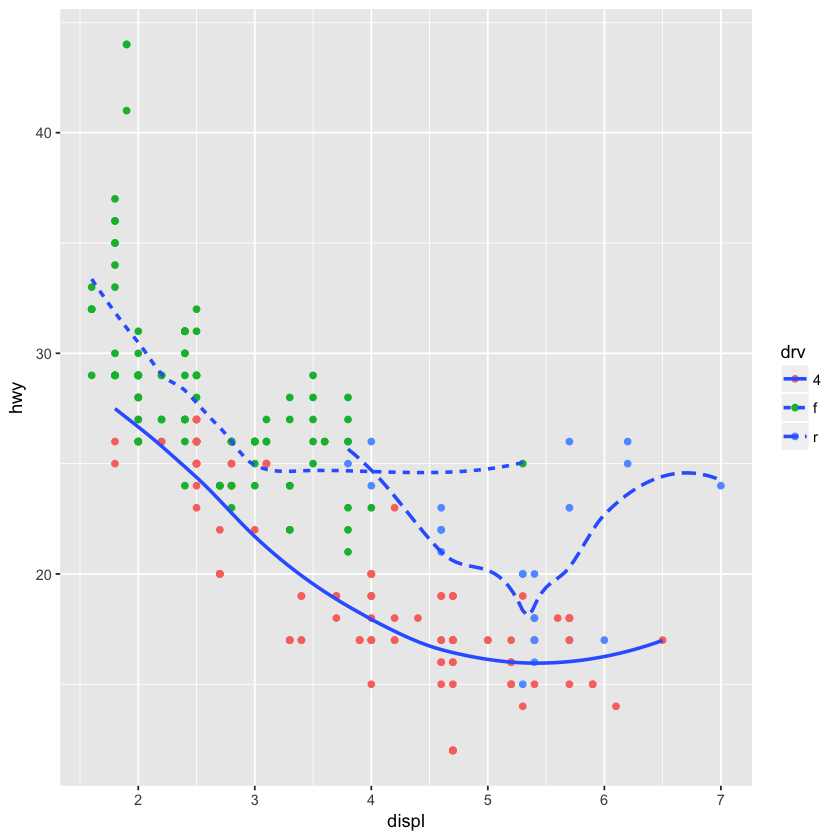

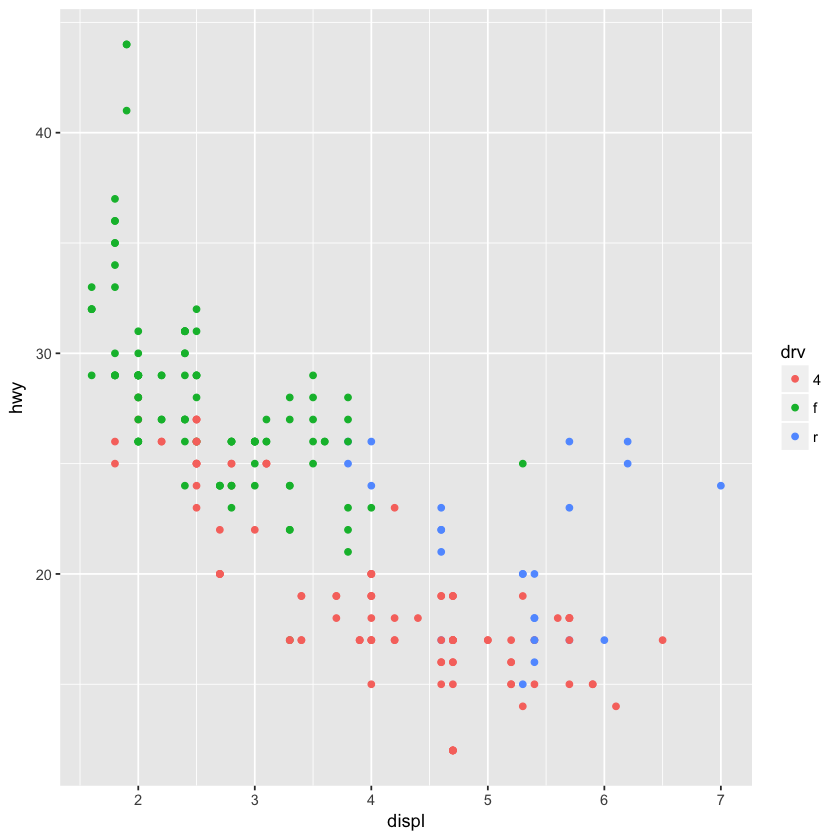

In [13]:
# Exercise 6
ggplot(data=mpg, mapping=aes(x=displ, y=hwy))+
geom_point() +
geom_smooth(se=FALSE)

ggplot(data=mpg, mapping=aes(x=displ, y=hwy))+
geom_point() +
geom_smooth(mapping=aes(group=drv),se=FALSE)

ggplot(data=mpg, mapping=aes(x=displ, y=hwy, color=drv))+
geom_point()+
geom_smooth(se=FALSE)

ggplot(data=mpg, mapping=aes(x=displ, y=hwy))+
geom_point(mapping=aes(color=drv))+
geom_smooth(se=FALSE)

ggplot(data=mpg, mapping=aes(x=displ, y=hwy))+
geom_point(mapping=aes(color=drv))+
geom_smooth(mapping=aes(linetype=drv),se=FALSE)

ggplot(data=mpg)+
geom_point(mapping=aes(x=displ, y=hwy,color=drv))

In [14]:
# Read in data set diamonds
data(diamonds)
str(diamonds)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	53940 obs. of  10 variables:
 $ carat  : num  0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num  61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num  55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int  326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num  3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num  3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num  2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


## Statistical Transformations

ggplot2 provides over 20 stats to use. Every goem has a default stat, and every stat has a default geom. 

1. Barcharts, histograms, and frequency polygons bin your data and then plot bin counts. 

2. Smoothers fit a model to your data and then plot predictions from the model. 

3. Boxplot compute a robust summary of the distribution and display a specially formmated box.

#### bar chart
1. You can color a bar chart using either color aesthetic or fill. 

2. Stacking is performed automatically by the position adjustment by the position argument. Position argument can take vales "identity", "dodge", or "fill". position="fill" make it easier to compare proportions across groups.position="dodge" makes it easier to compare individual values

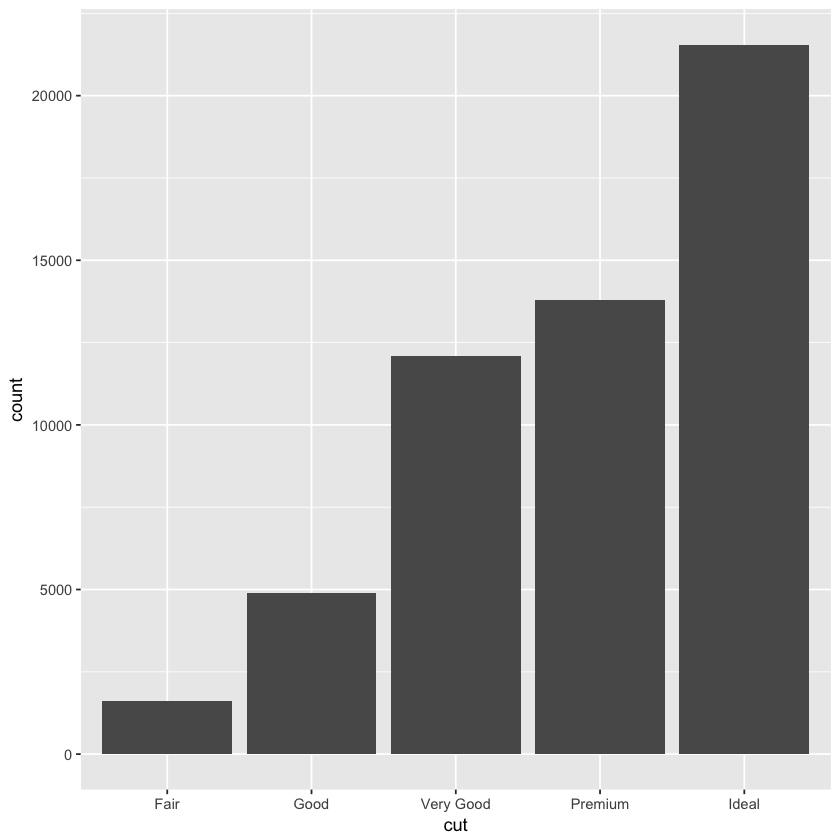

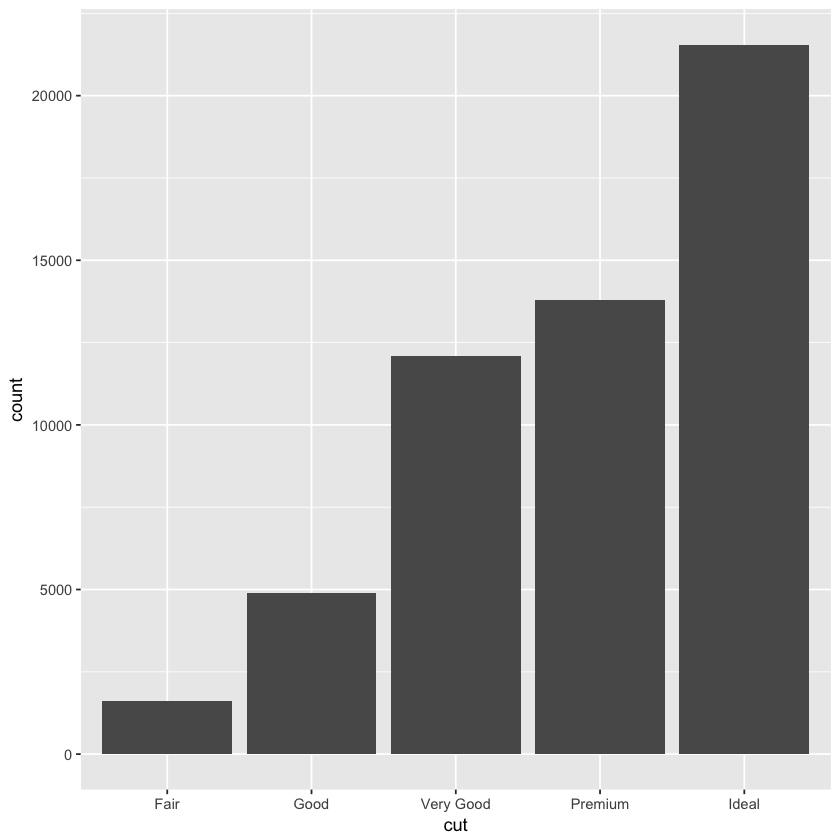

In [15]:
# geom: geom_barplot
ggplot(data=diamonds)+
geom_bar(mapping=aes(x=cut))

# stat: stat_count
ggplot(data=diamonds)+
stat_count(mapping=aes(x=cut))

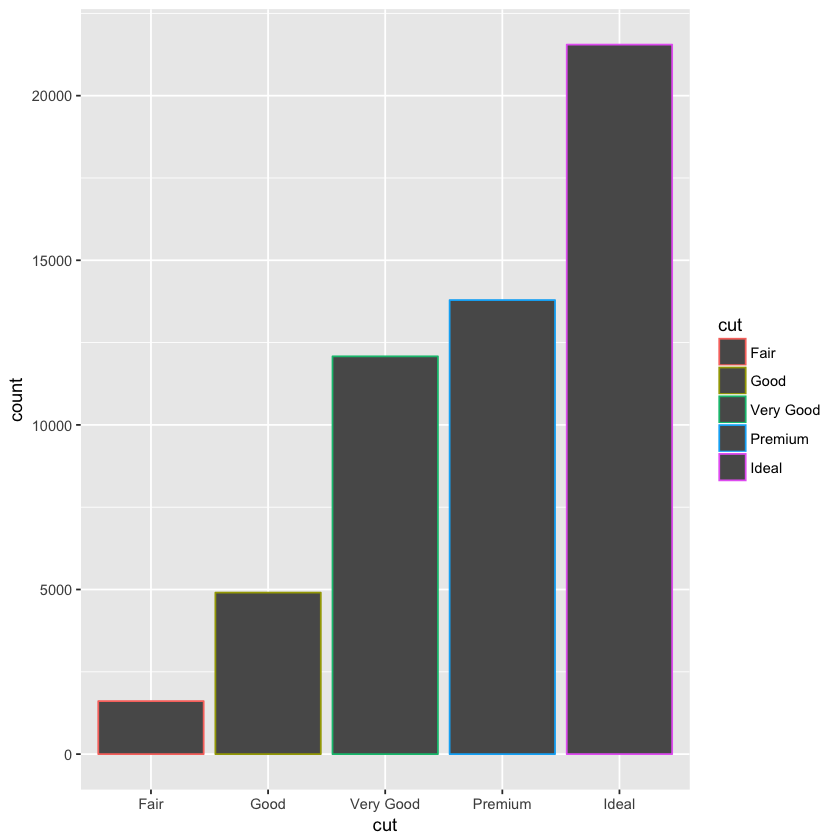

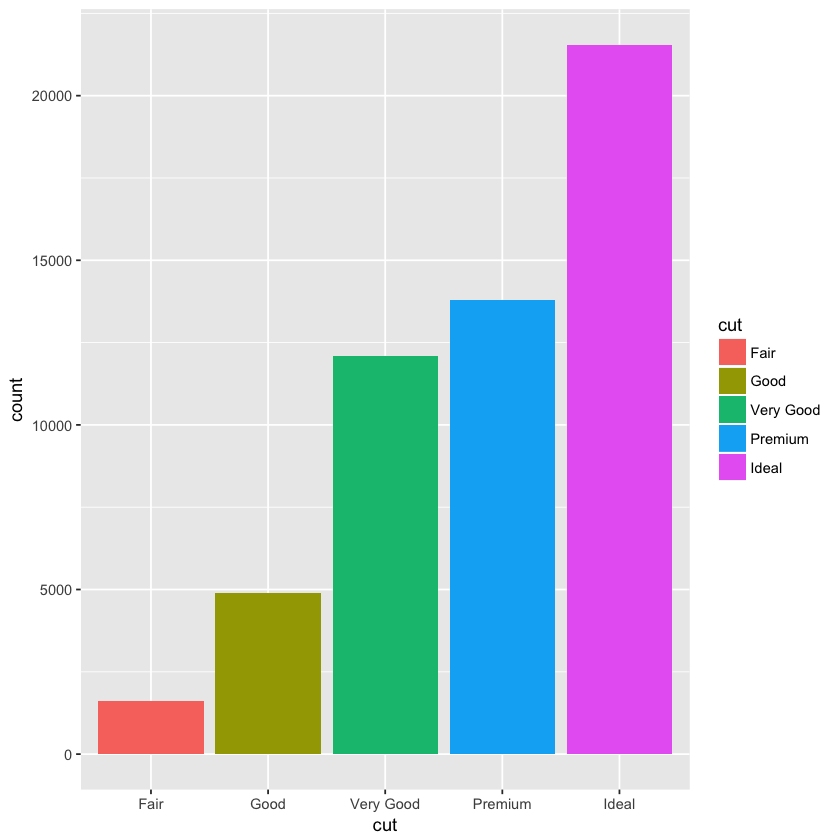

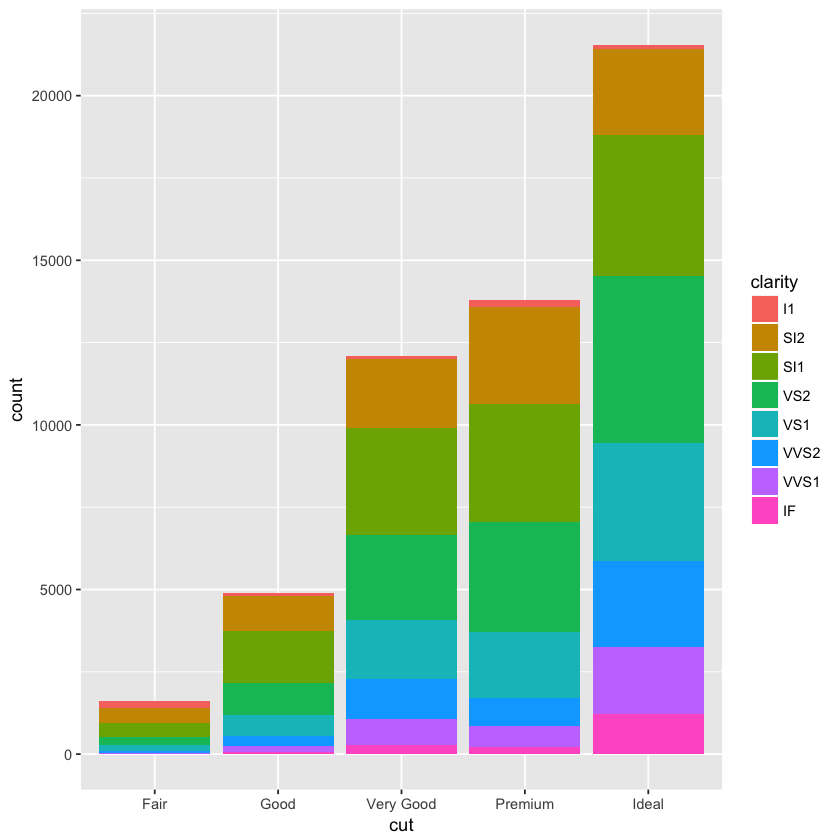

In [16]:
# color: color bar chart
ggplot(data=diamonds) +
geom_bar(mapping=aes(x=cut, color=cut))

# fill: color bar chart
ggplot(data=diamonds) +
geom_bar(mapping=aes(x=cut, fill=cut))

# map the fill aesthetic to another variable: Stacking
# each colored rectangle represent a comb of cut and clarity
ggplot(data=diamonds) +
geom_bar(mapping=aes(x=cut, fill=clarity))

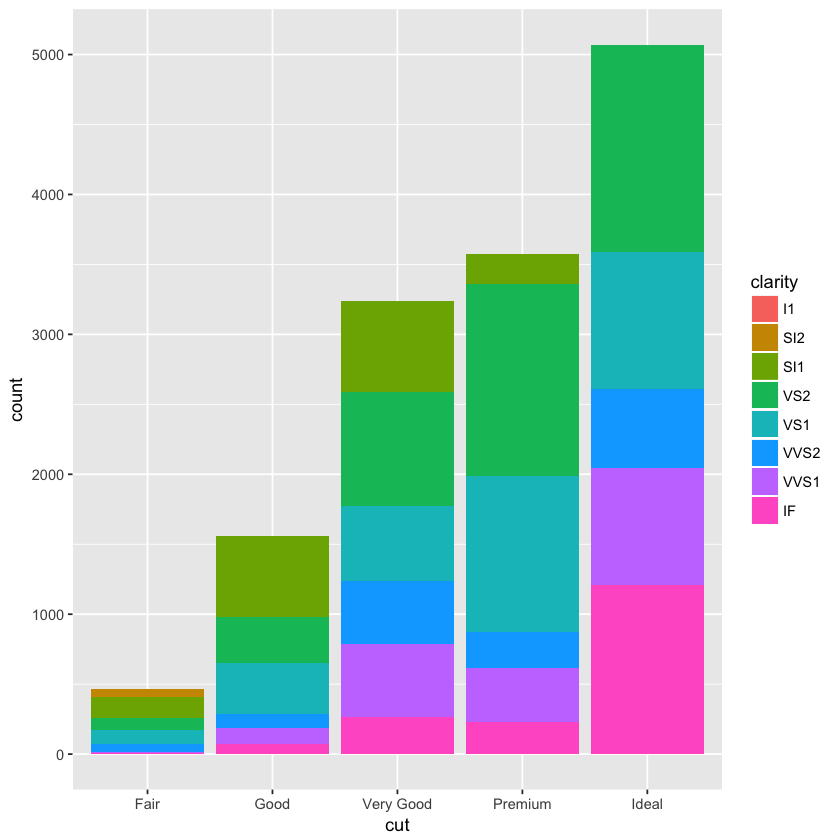

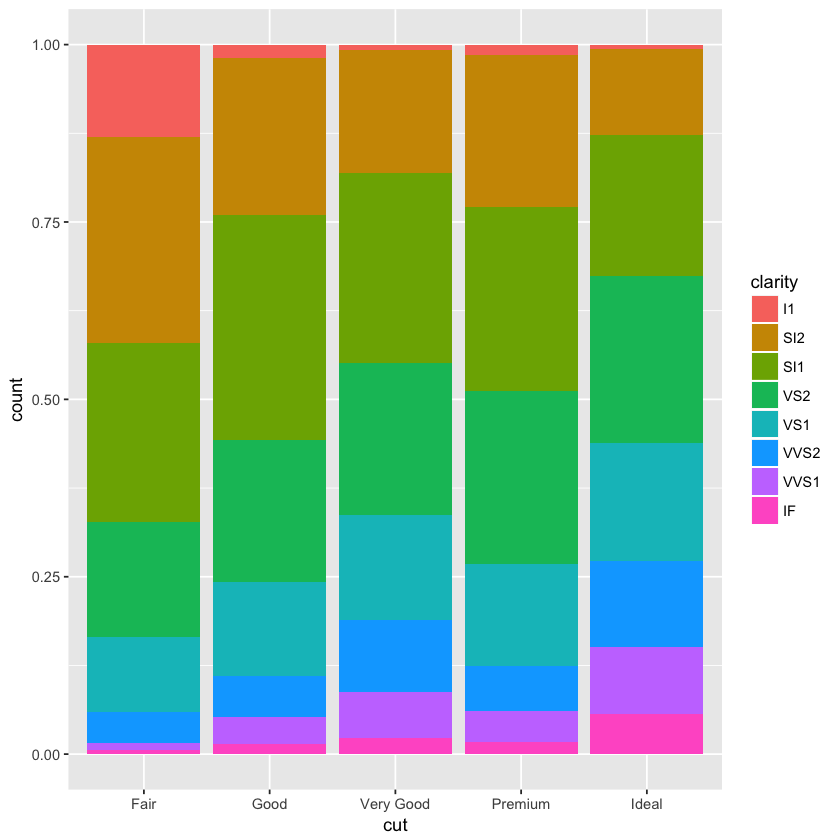

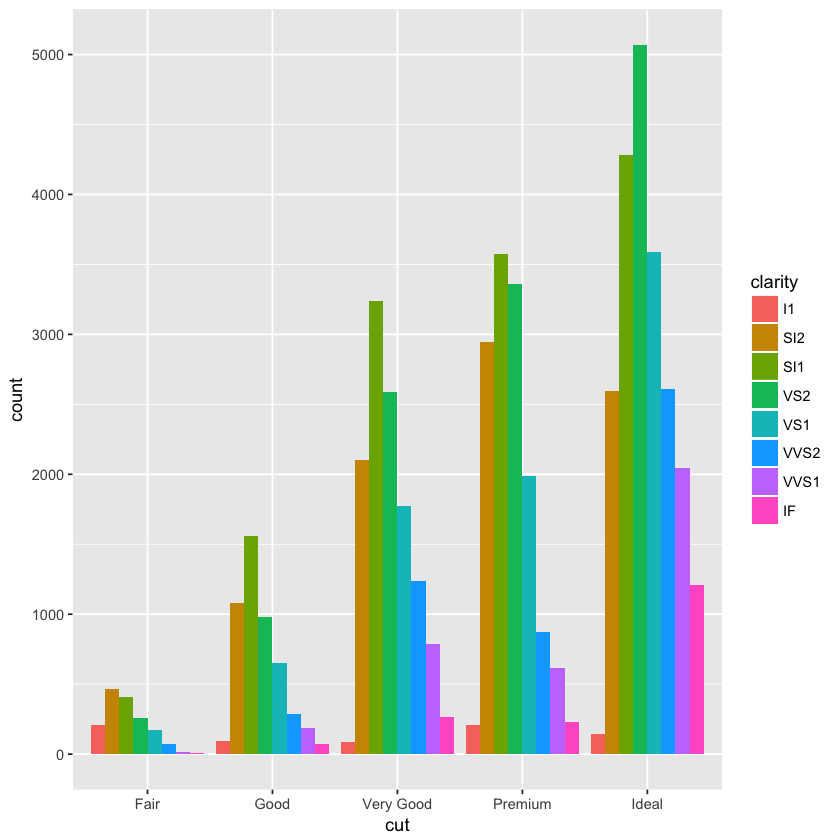

In [17]:
# Example: position adjustment

# position = "identity": Stacking
ggplot(data=diamonds)+
geom_bar(mapping=aes(x=cut,fill=clarity), position="identity")

# position="fill": easier to compare across groups
ggplot(data=diamonds)+
geom_bar(mapping=aes(x=cut,fill=clarity), position="fill")

# position="dodge":easier to compare within groups
ggplot(data=diamonds)+
geom_bar(mapping=aes(x=cut,fill=clarity), position="dodge")

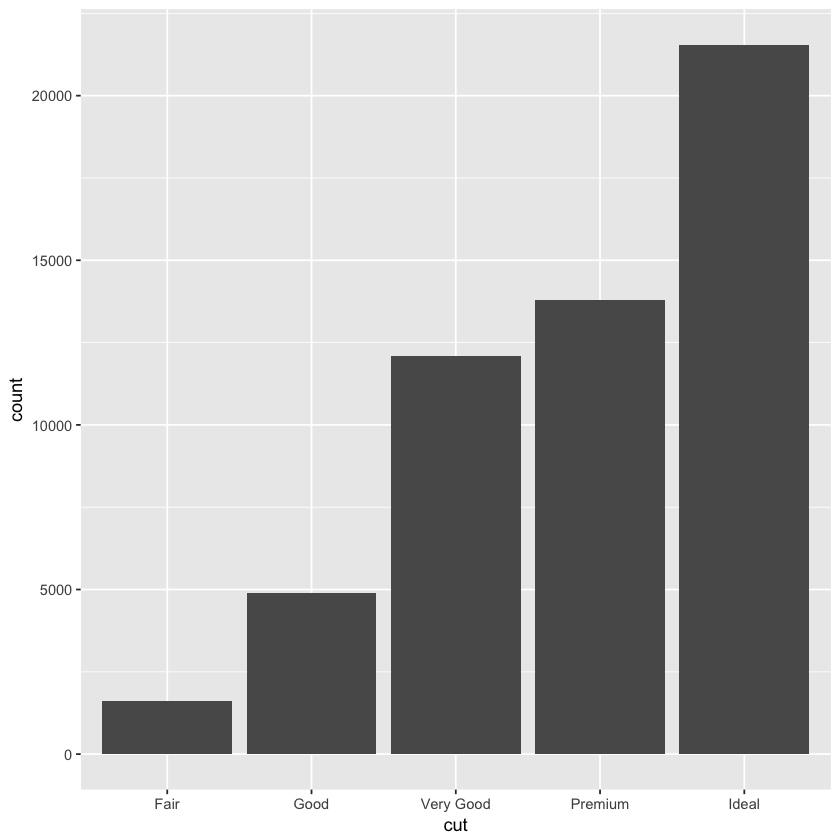

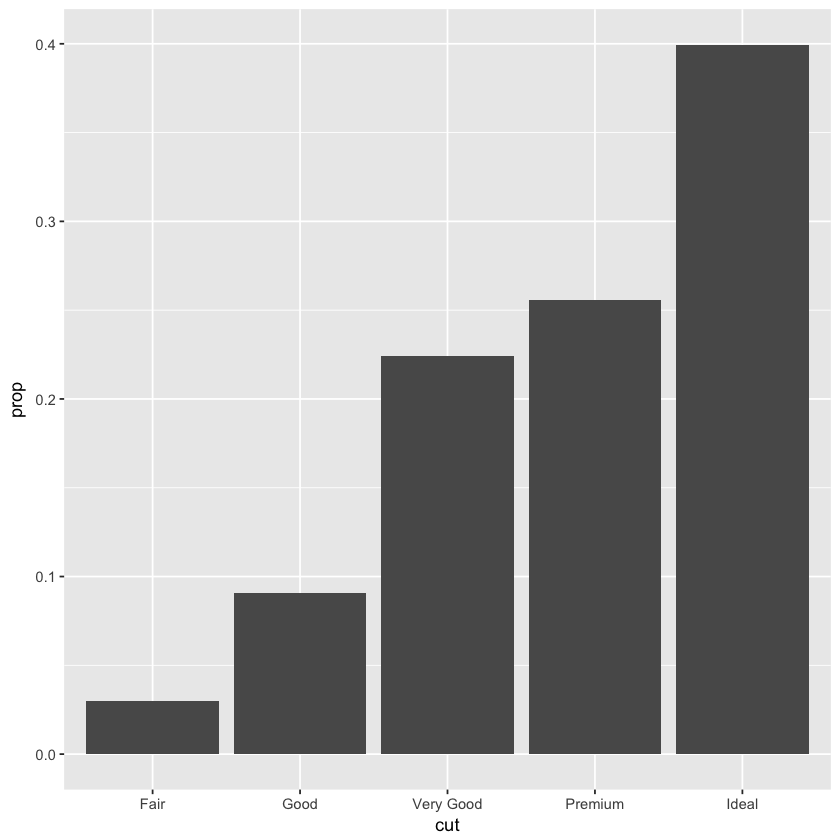

In [18]:
# a bar chart of count
ggplot(data=diamonds)+
geom_bar(mapping=aes(x=cut))

# a bar chart of proportion
ggplot(data=diamonds)+
geom_bar(mapping=aes(x=cut, y=..prop..,group=1))

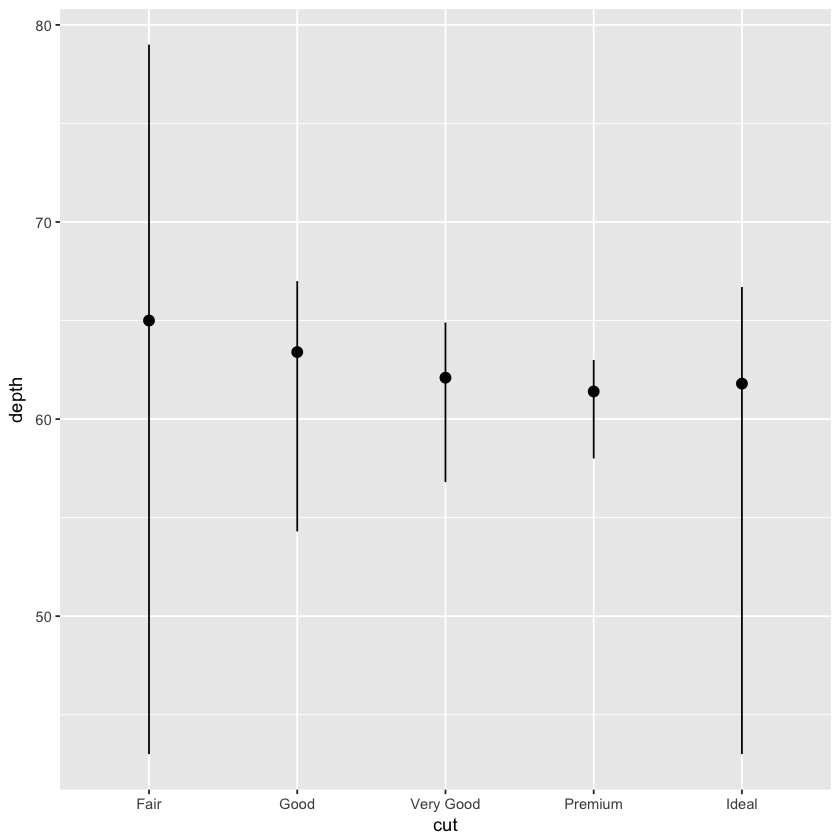

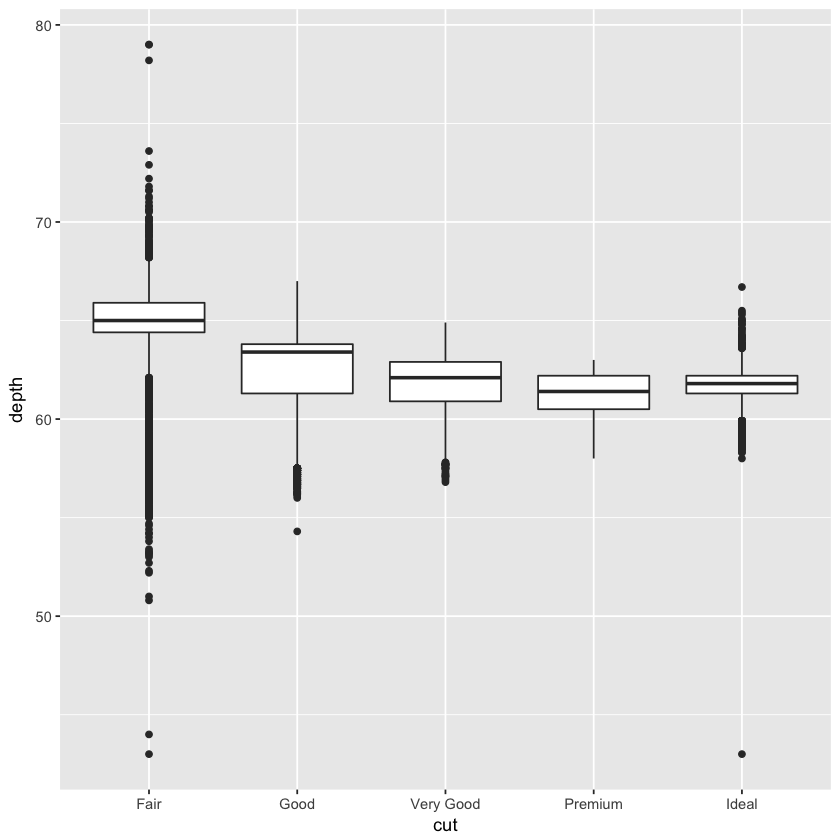

In [19]:
## 
ggplot(data=diamonds)+
stat_summary(mapping=aes(x=cut, y=depth),
            fun.ymin=min,
            fun.ymax=max,
            fun.y=median)

ggplot(data=diamonds)+
geom_boxplot(mapping=aes(x=cut, y=depth))

## Position Adjustment

#### bar chart position: stacking, identity, fill, dodge
Stacking is performed automatically by the position adjustment by the position argument. Position argument can take vales "identity", "dodge", or "fill". position="fill" make it easier to compare proportions across groups.position="dodge" makes it easier to compare individual values.

#### scatterplot position: "jitter"
position="jitter" adds a small amount of random noise to each points. This spread points out because no two points are likely to receive the same amount of random noice. This can overcame the overplotting prolem of scatter plot, where points overlapped each other.

#### geom_jitter = geom_point( position="jitter")

Note: To learn more about position, use ?position_dodge.

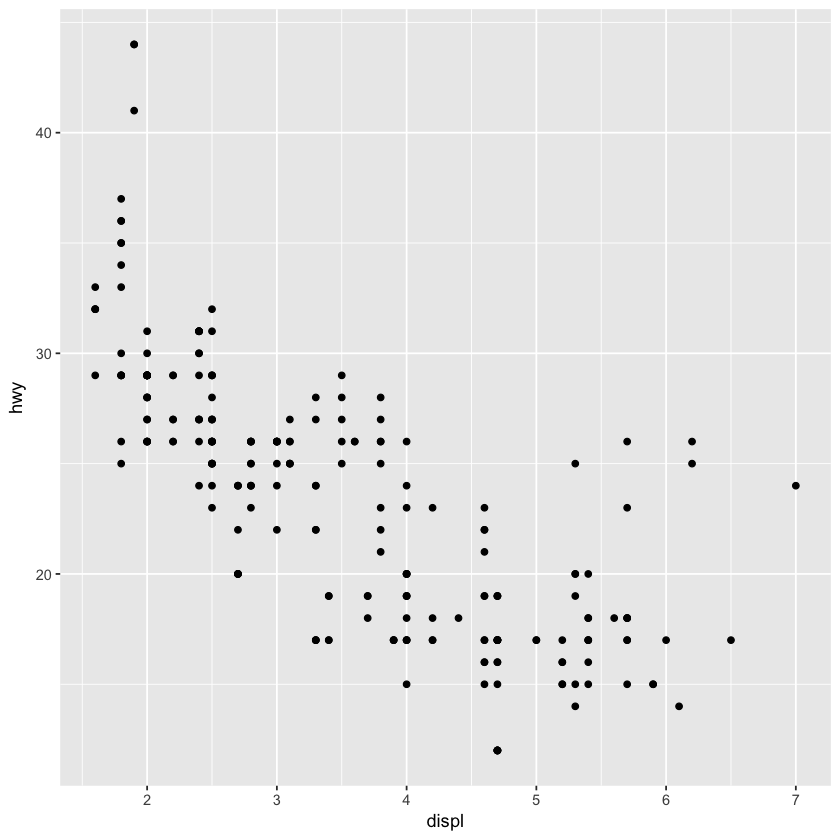

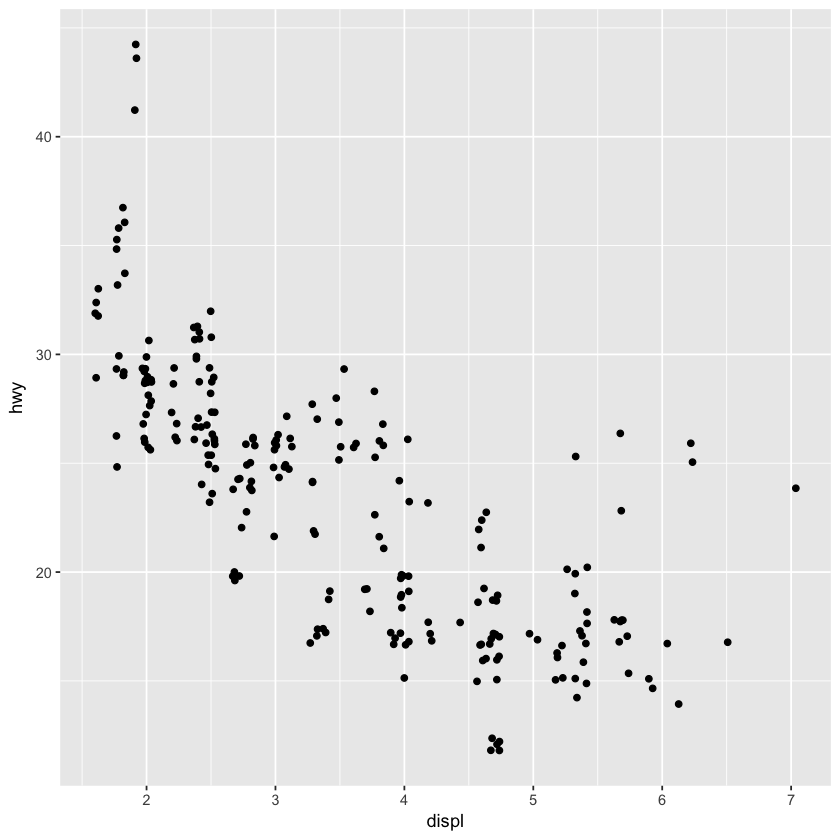

In [20]:
# overplotting scatterplot
ggplot(data=mpg)+
geom_point(mapping=aes(x=displ, y=hwy))

# scatterplot with position jitter
ggplot(data=mpg)+
geom_point(mapping=aes(x=displ, y=hwy), position="jitter")

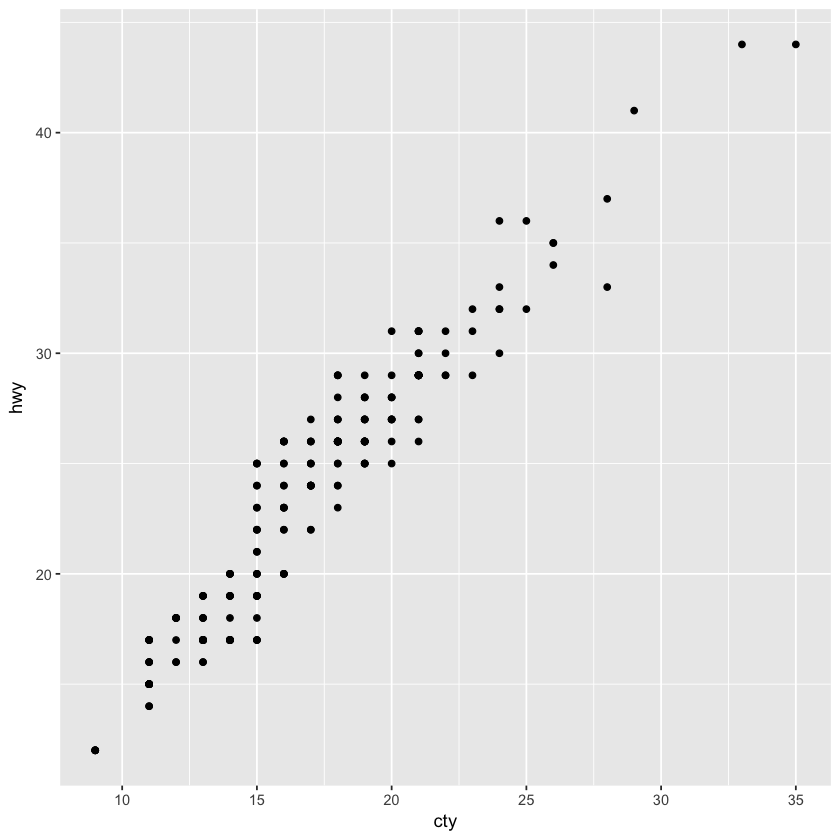

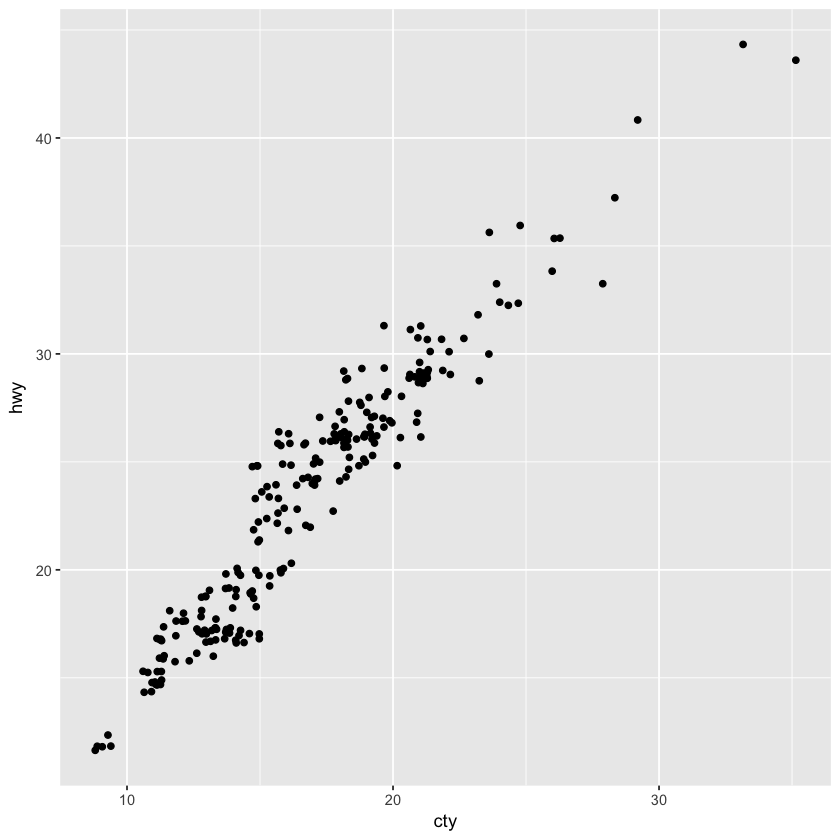

In [21]:
# overplotting
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) +
geom_point()

# geom_jitter
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) +
geom_jitter()

## Coordinate Systems

Coordinate Systems are probably the most complicate part of ggplot2. 

#### coord_flip(): 
switches the x and y axes. It is useful if you want horizontal boxplots, and usefull for long labels.

#### coord_quickmap()
Set the aspect ratio correctly for maps. It is important if you are plotting spatial data with ggplot2.

#### coord_polar()
Polar coordinates reveals an interesting connectin between a bar chart and a Coxcomb chart. 

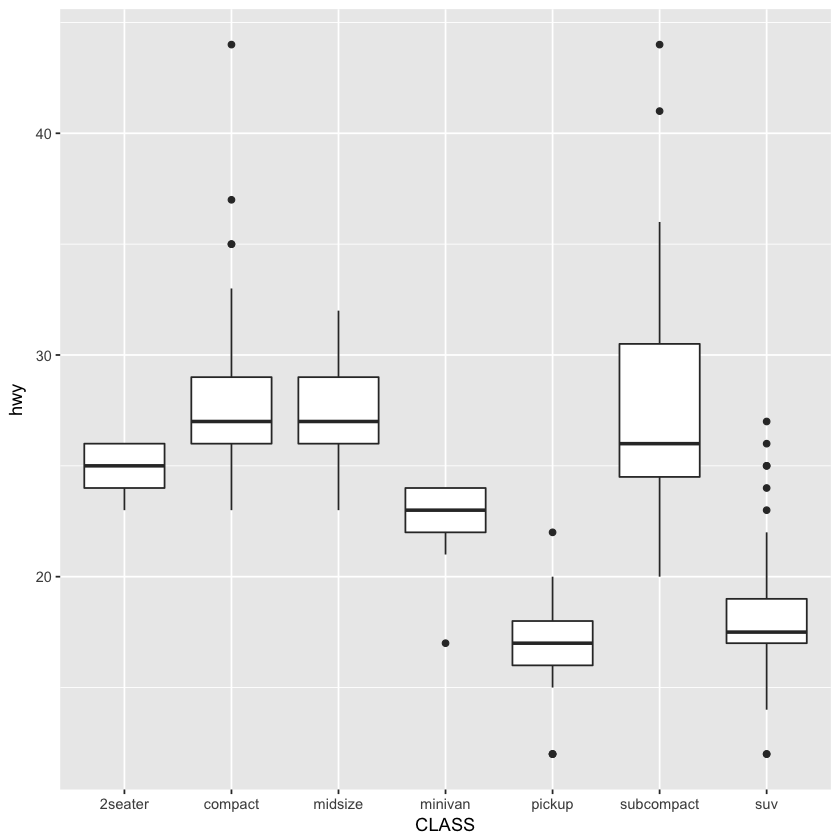

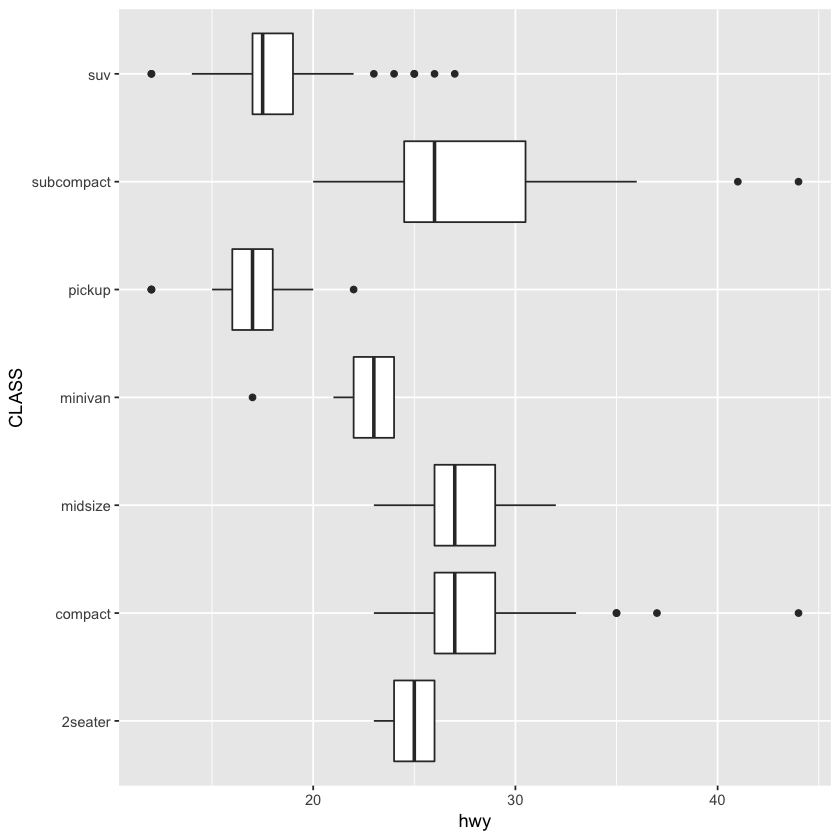

In [22]:
## Example: coord_flip
# vertical boxplot
ggplot(data = mpg, mapping = aes(x = CLASS, y = hwy)) +
geom_boxplot()

# horizontal boxplot
ggplot(data = mpg, mapping = aes(x = CLASS, y = hwy)) +
geom_boxplot()+
coord_flip()

Warning message:
“package ‘maps’ was built under R version 3.2.5”
Attaching package: ‘maps’

The following object is masked from ‘package:purrr’:

    map



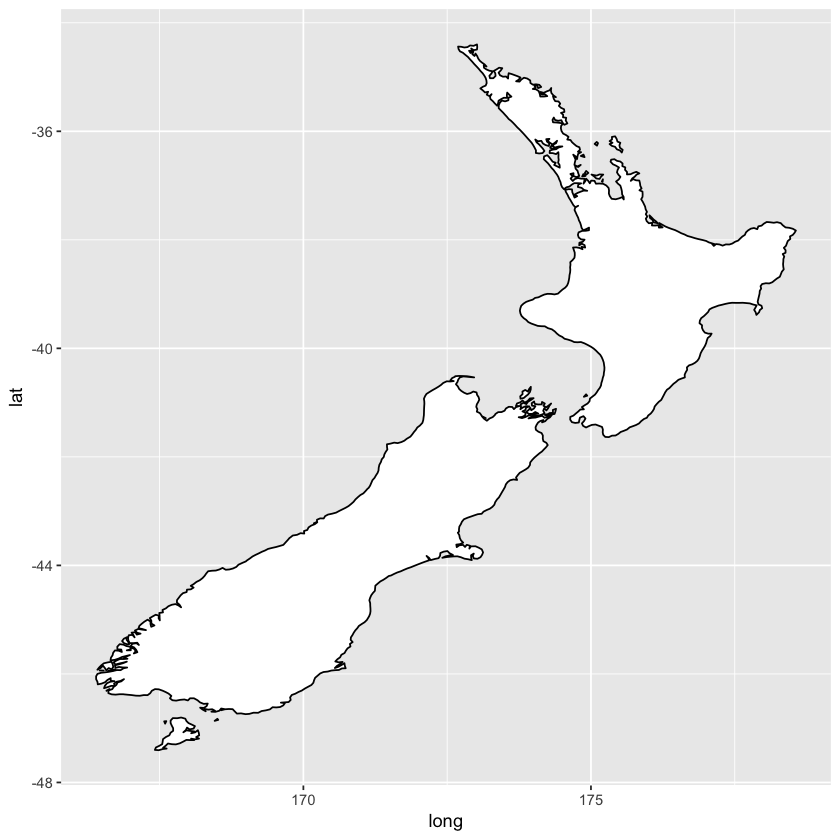

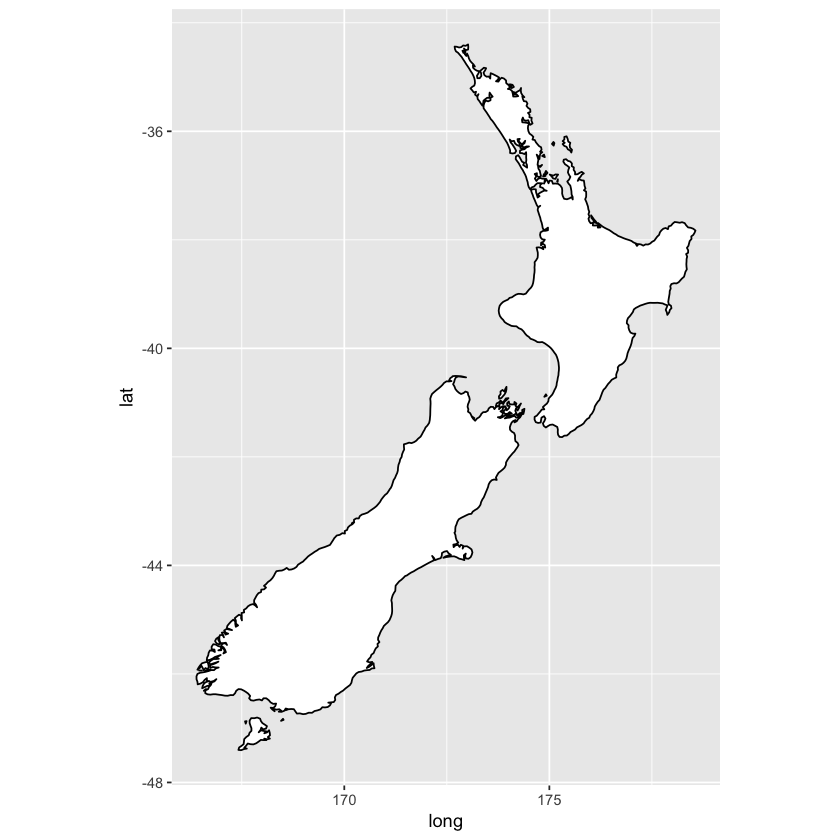

In [23]:
## Example: coord_quickmap()
# install.packages("maps")
library(maps)
nz = map_data("nz")

ggplot(data=nz, mapping=aes(x=long, y=lat, group=group))+
geom_polygon(fill="white", color="black")

ggplot(data=nz, mapping=aes(x=long, y=lat, group=group))+
geom_polygon(fill="white", color="black")+
coord_quickmap()

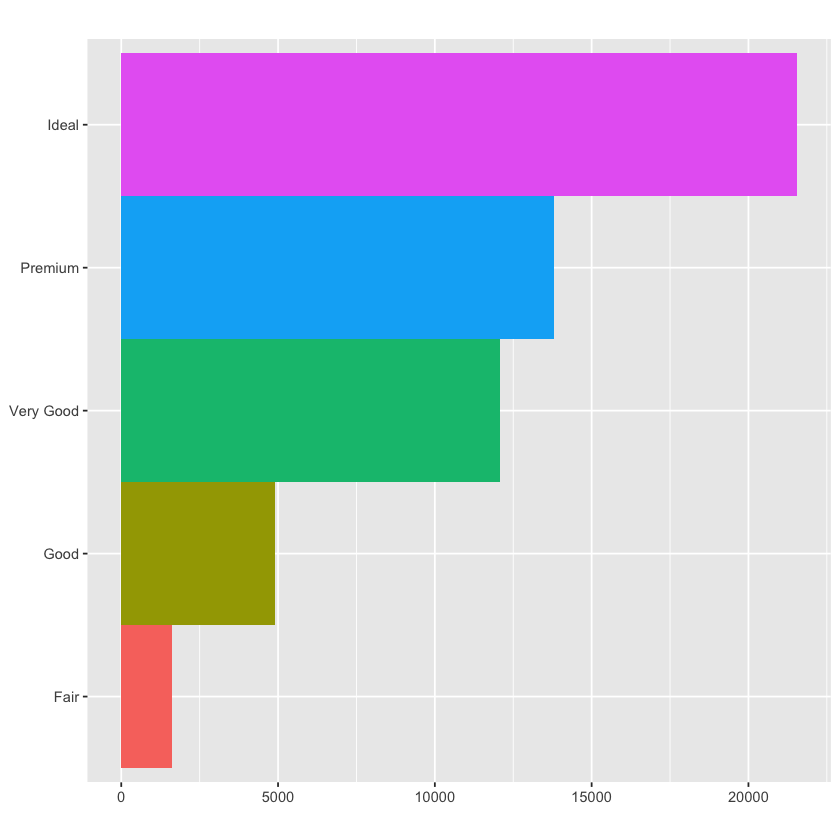

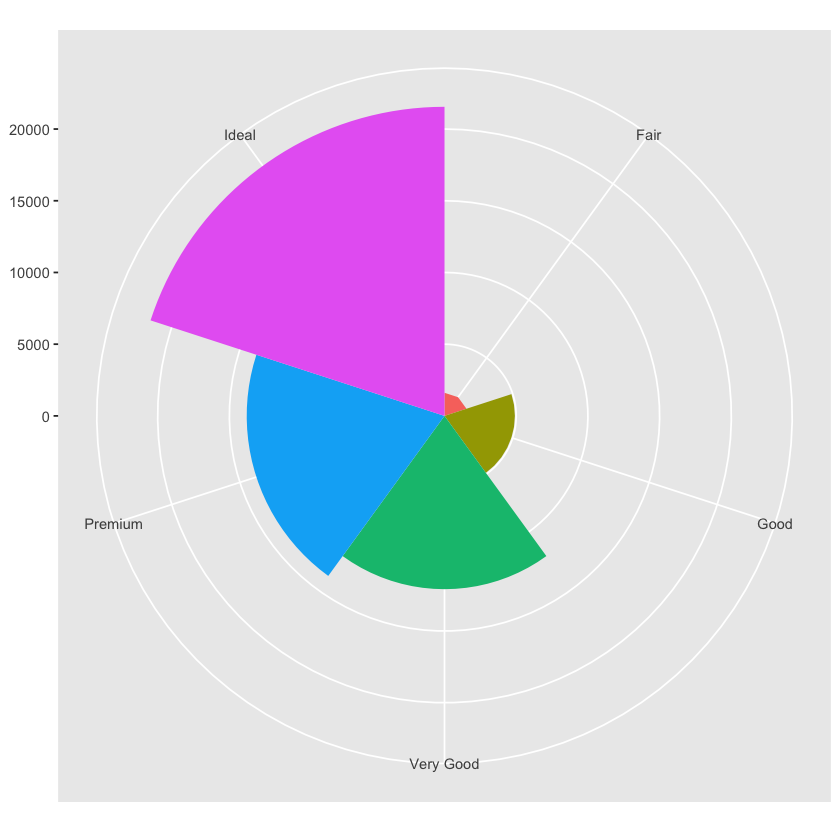

In [24]:
## Example: coord_polar
# vertical bar chart
bar = ggplot(data=diamonds) + 
      geom_bar(mapping=aes(x=cut, fill=cut),
               show.legend=FALSE,
               width=1)+
      theme(aspect.ratio=1)+
      labs(x=NULL, y=NULL)
# horizontal bar chart
bar + coord_flip()
# coxcomb chart 
bar + coord_polar()

## Modify axis labels, titles, captions

Use the plot title and subtitle to explain main findings and use caption to provide information about data source.

labs(x, y, title, subtitle, caption)

xlab(label)

ylab(label)

ggtitle(label, subtitle=NULL)

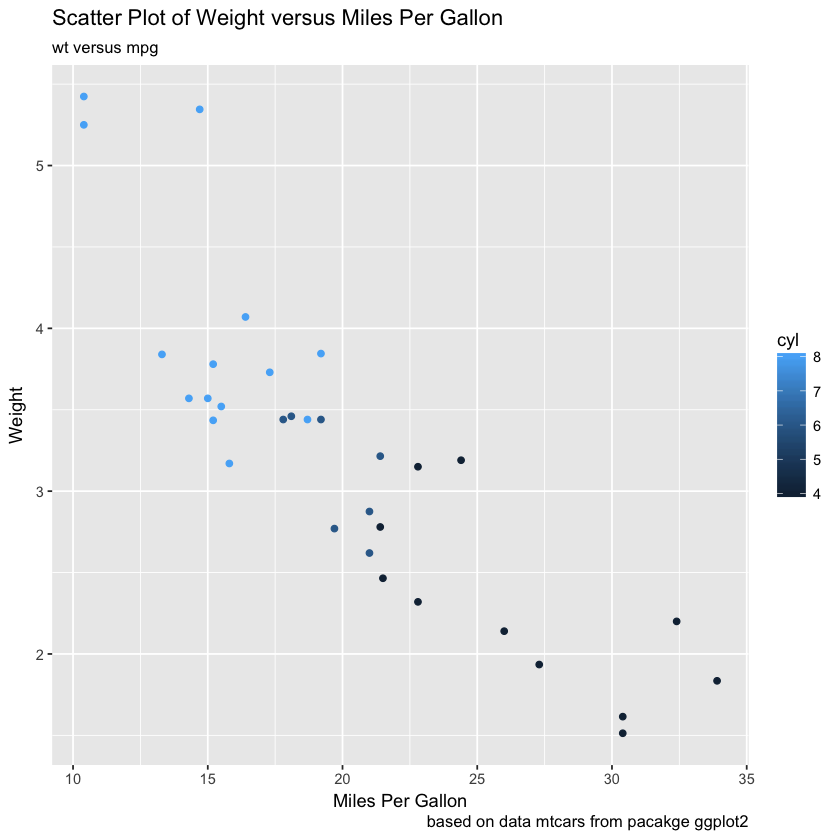

In [25]:
# Example 1
library(ggplot2)
data(mtcars)

ggplot(data=mtcars)+
geom_point(mapping=aes(x=mpg, y=wt, color=cyl))+
labs(x="Miles Per Gallon", y="Weight", 
     title="Scatter Plot of Weight versus Miles Per Gallon", 
     subtitle="wt versus mpg",
     caption="based on data mtcars from pacakge ggplot2")

## theme {ggplot2}

Use theme() to modify individual components of a theme. Note that theme() only affect a single plot.


theme( line, rect, text, title, aspect.ratio, axis.title, axis.title.x, axis.title.y, axis.text, axis.text.x, axis.text.y, axix.ticks,....)

#### Example

~ change text size of plot title

plot.title = element_text(size=9)

~ change plot background color 

plot.background = element_rect(fill="blue", color="red")

~ change panel background color
panel.background = element_rect(fill="white", color="red")

~ change panel border

theme(panel.border = element_rect(linetype="dashed", fill=NA))

~ change panel grid color

theme(panel.grid.major = element_line(color="black"))

#### axis
~ change axis line

theme(axis.line = element_line(size=3, color="blue"))

~ change axis text

theme(axis.text.x = element_text(algle=90, hjust=1))

~ change axis ticks

theme(axis.ticks = element_line(size=2), axis.ticks.length=unit(0.25, "cm"))

~ change text of axis x title

theme(axis.title.x = element_text(size=rel(1.5), angle=90))

#### text
text=element_text(size=12), # set text size

#### legend
~ change legend position

theme(lengend.position = c("none","bottom","left","right"))

theme(legend.position = c(0.95, 0.95))

~ change legend box background

theme(legend.box.background = element_rect())

~ change legend text 

theme(legend.text = element_text(size=8, color="red"))

~ change legend title

theme(legend.tile = element_text(face="bold"))

#### strips

theme( strip.background = element_rect(color="black", fill="white"))

theme( strip.text = element_text(color="white", face="bold"))

theme( panel.spacing = unit(1, "lines"))

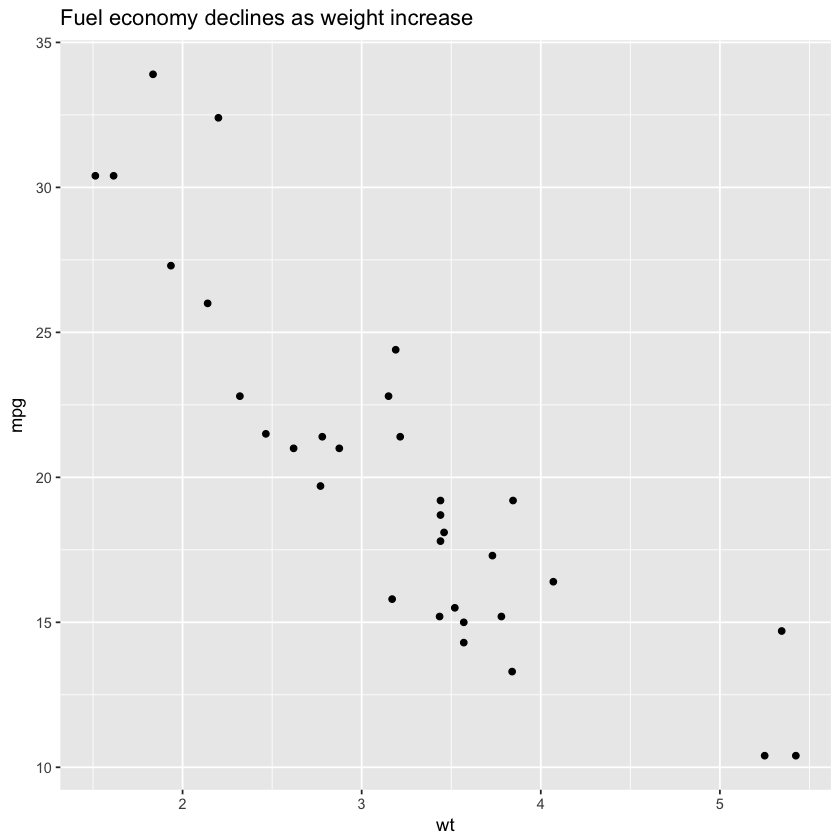

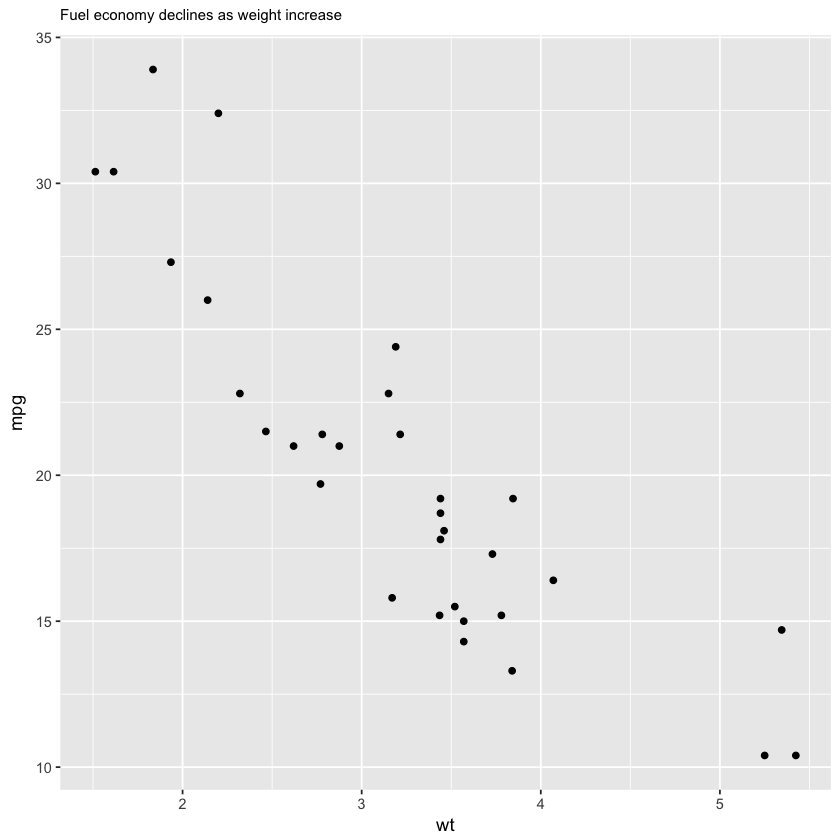

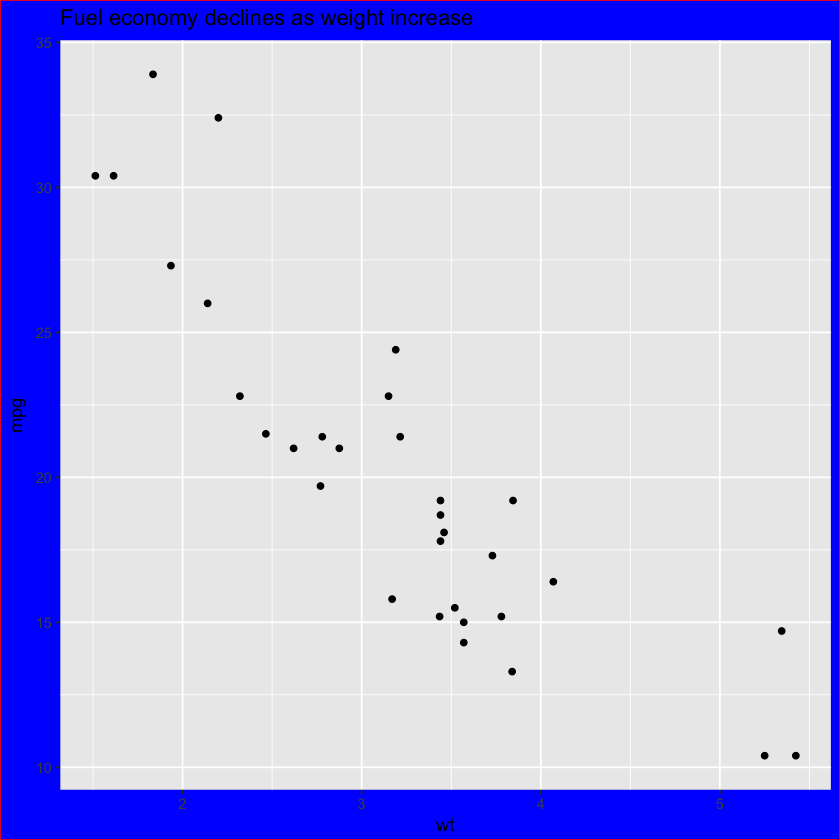

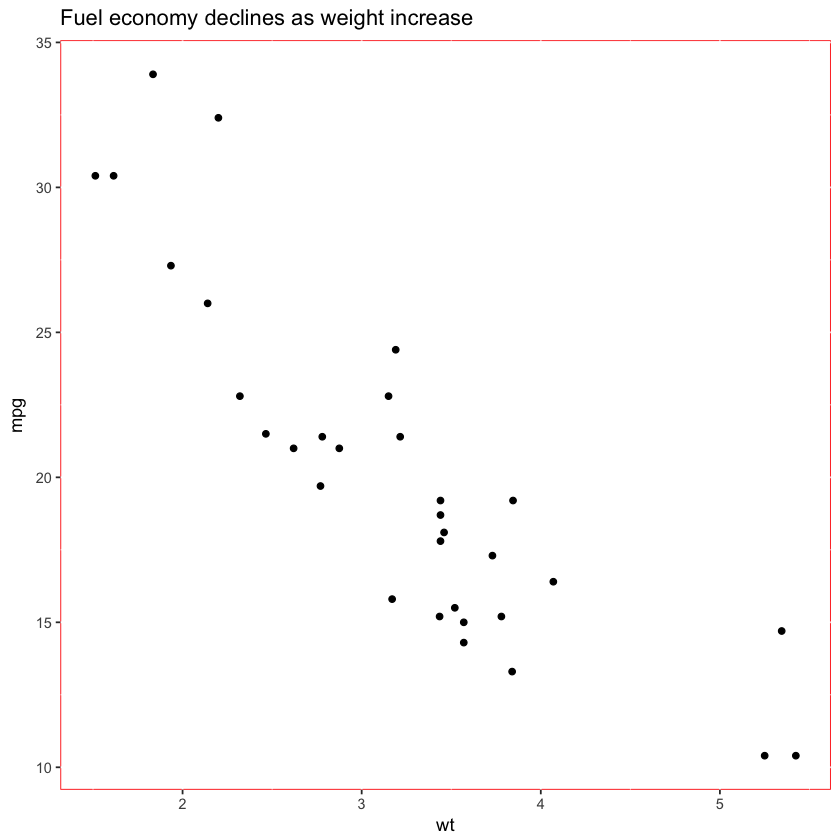

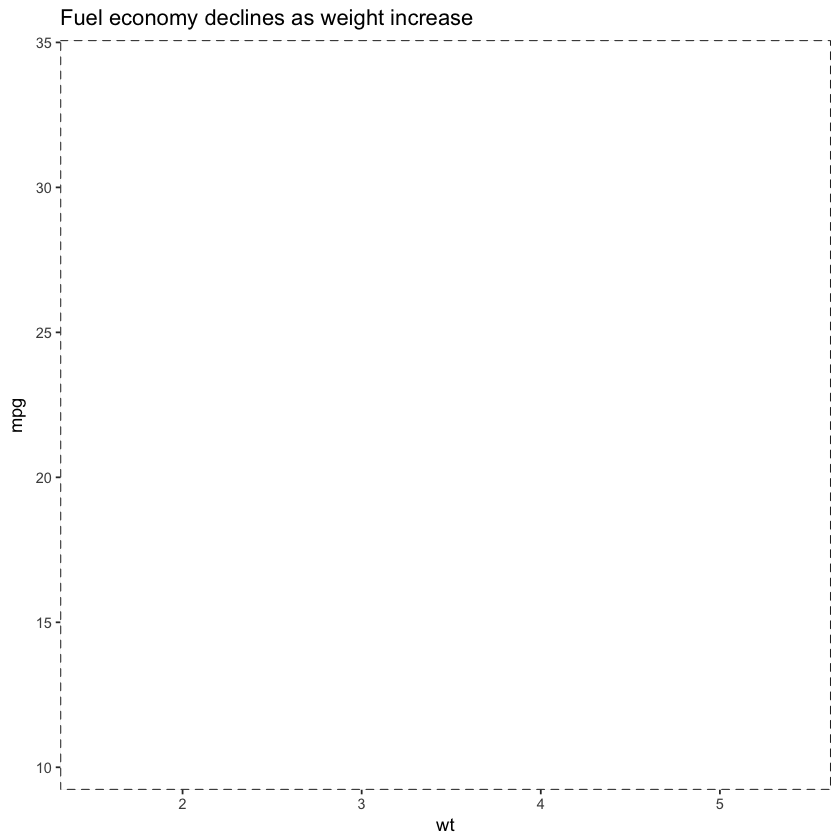

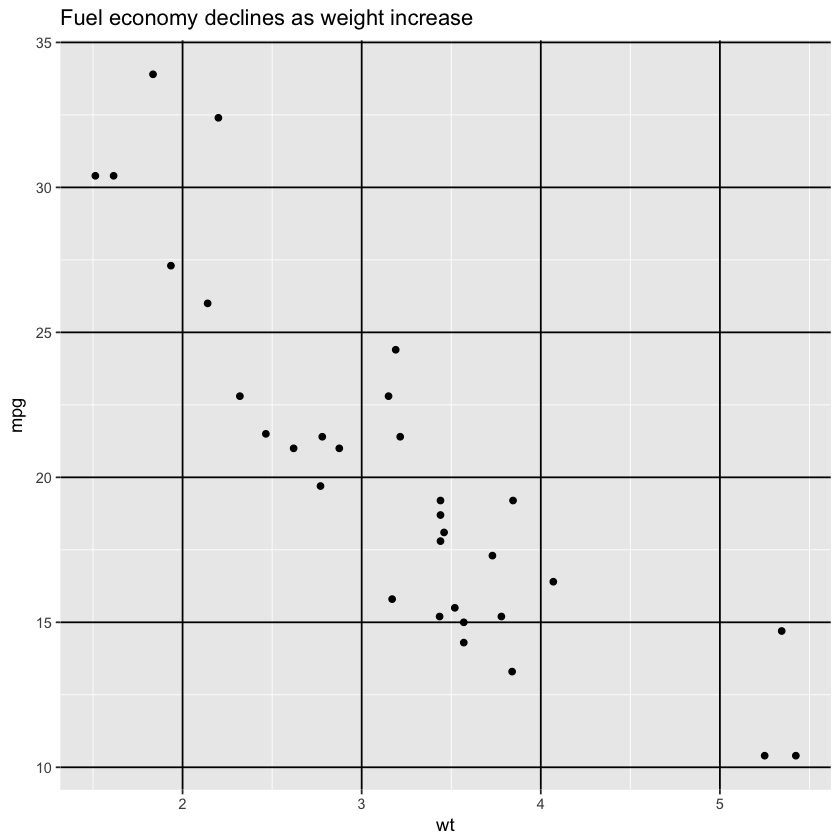

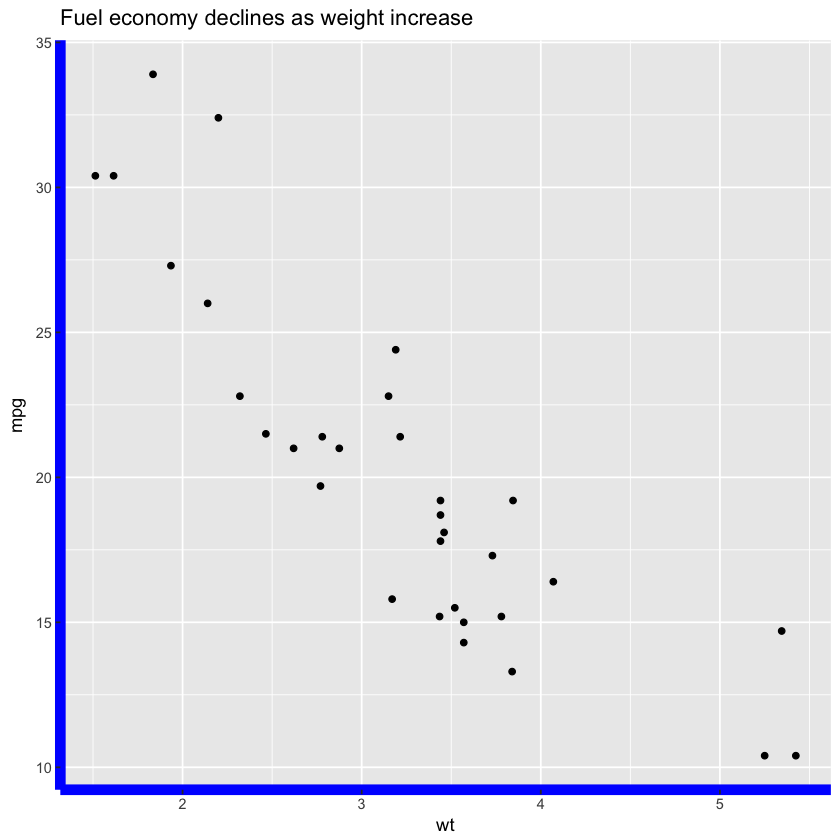

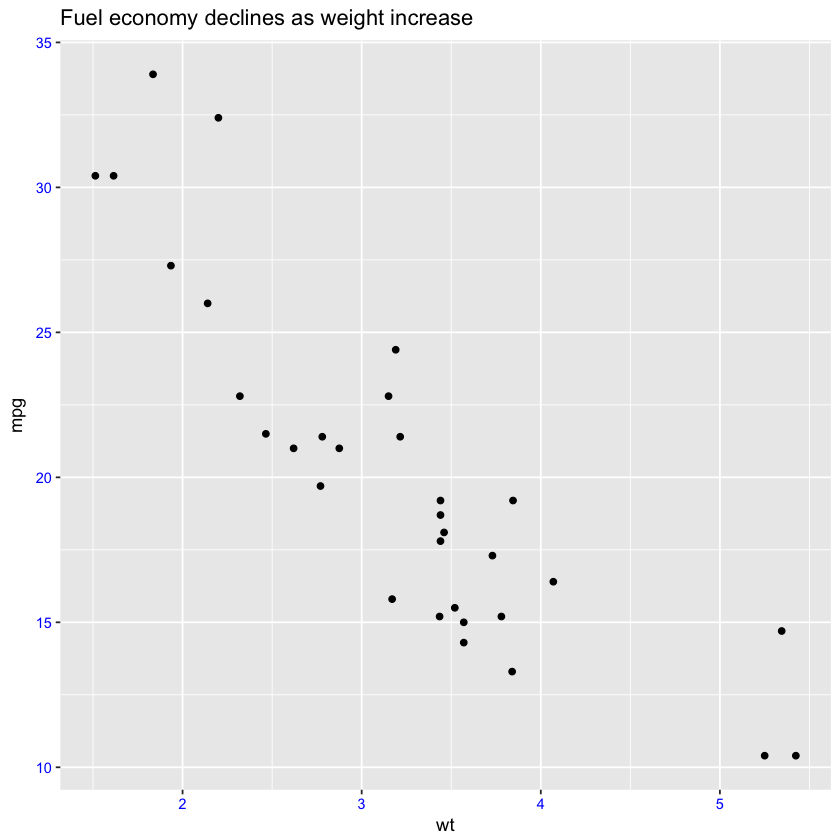

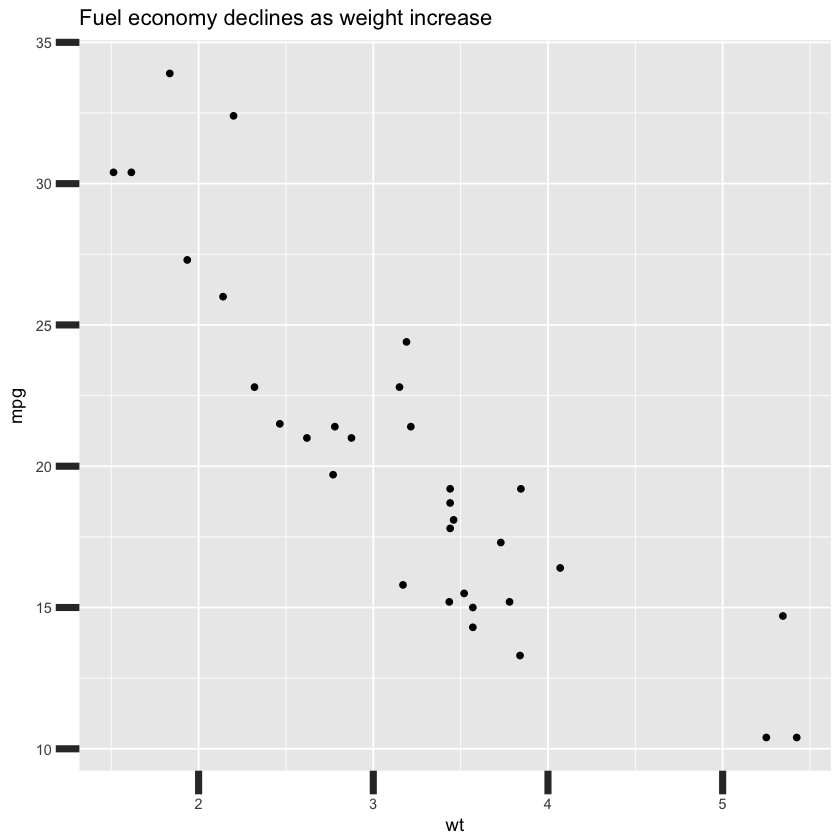

In [26]:
# Example 1
library(ggplot2)
data(mtcars)

p1 = ggplot(mtcars)+
geom_point(aes(x=wt, y=mpg))+
labs(title="Fuel economy declines as weight increase")
p1

# change text size of plot title
p1 + theme(plot.title=element_text(size=9))

# change plot background
p1 + theme(plot.background = element_rect(fill="blue", color="red"))

# change panel background
p1 + theme(panel.background = element_rect(fill="white", color="red"))

# change panel border
p1 + theme(panel.border = element_rect(linetype="dashed"))

# change panel grid color
p1 + theme(panel.grid.major = element_line(color="black"))

# change axis line
p1 + theme(axis.line = element_line(size=3, color="blue"))

# change axis text
p1 + theme(axis.text = element_text(color="blue"))

# change axis ticks
p1 + theme(axis.ticks = element_line(size=2), 
           axis.ticks.length = unit(0.5, "cm") )

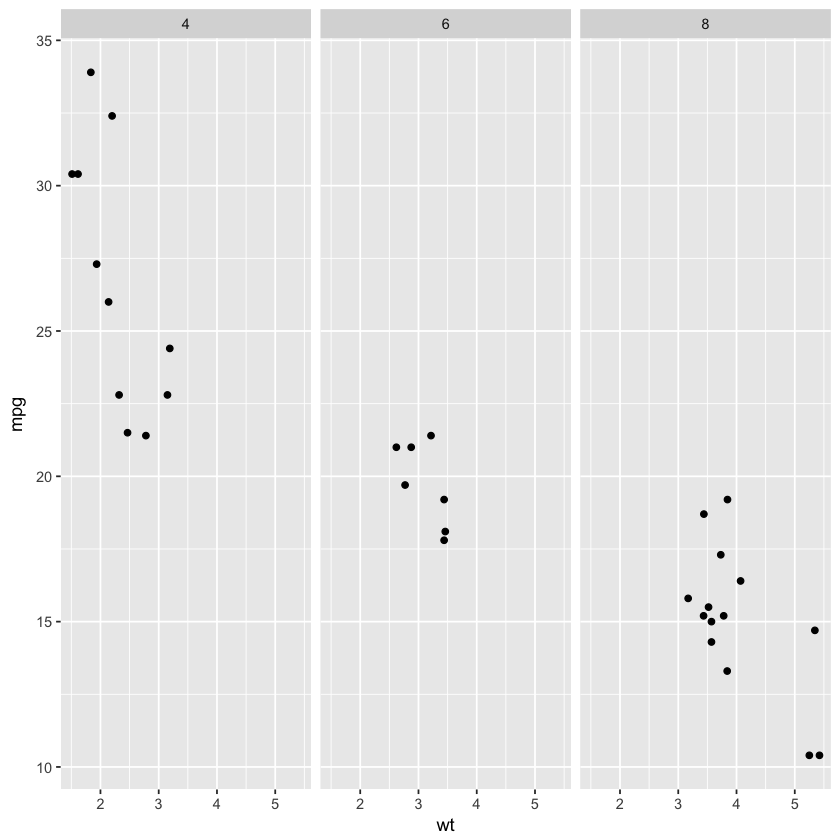

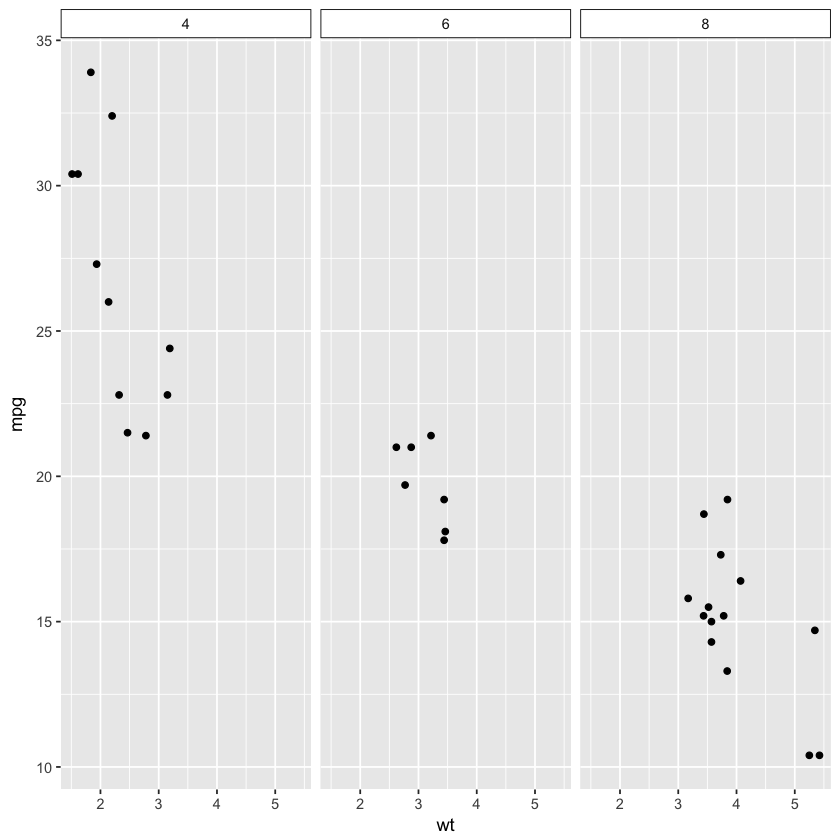

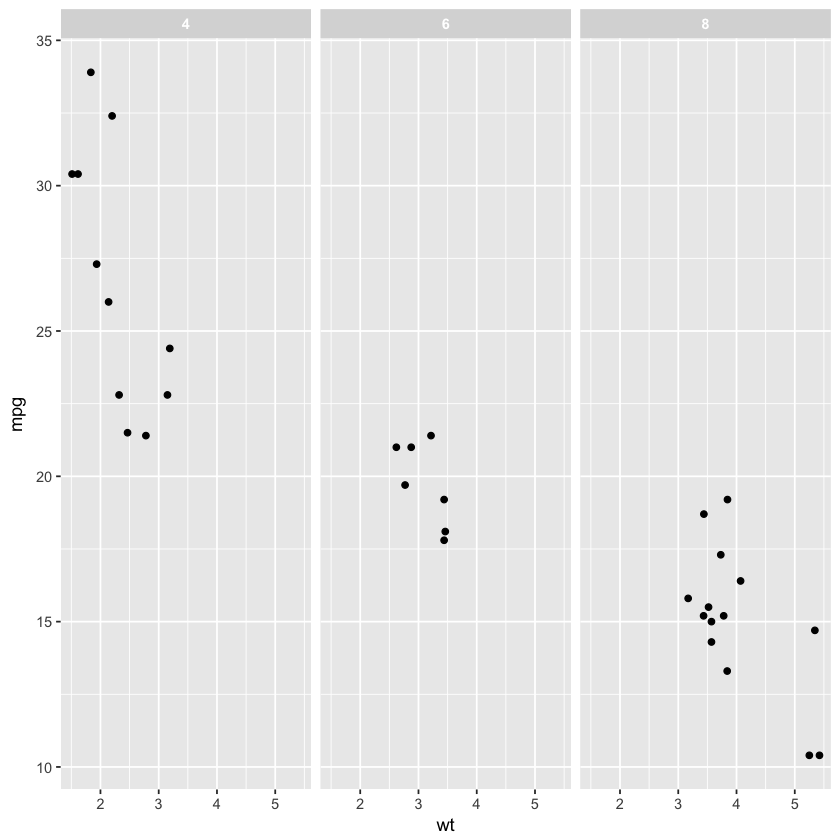

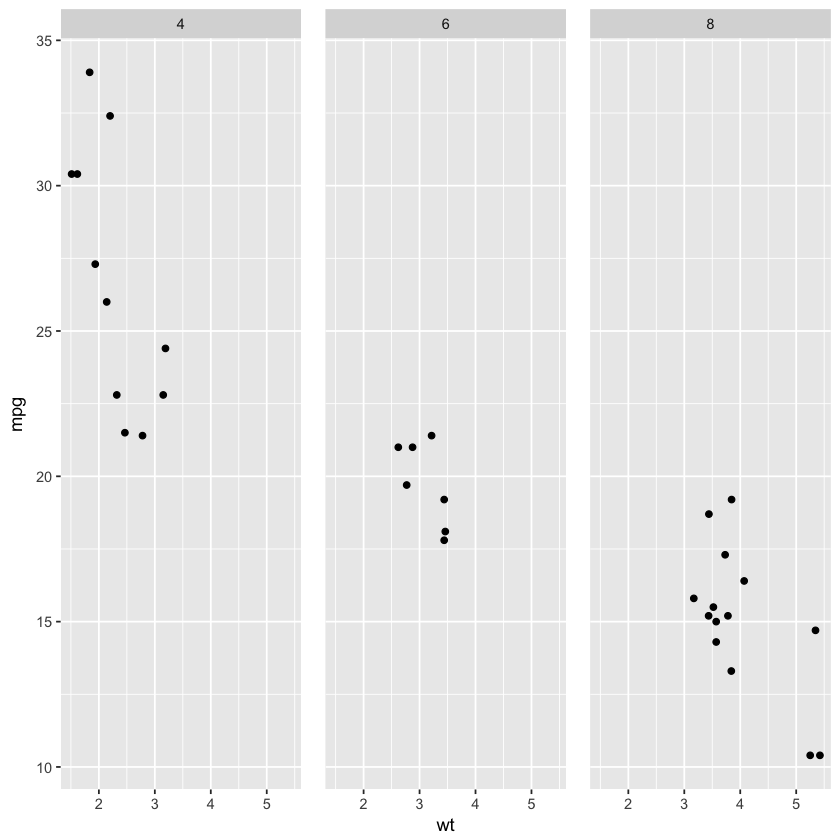

In [27]:
# Example 2
library(ggplot2)
data(mtcars)

p1 = ggplot(mtcars)+
geom_point(aes(x=wt, y=mpg))+
facet_wrap(~cyl)
p1

# change strips background
p1 + theme(strip.background = element_rect(color="black", fill="white"))

# change strip text
p1 + theme( strip.text = element_text(color="white", face="bold"))

# change panel spacing
p1 + theme( panel.spacing = unit(1, "lines"))

# Note

1. If we need to be explicit about where a function (or dataset) comes from, we’ll use the special form package::function().

2. To learn more about a data frame in a package, open its help page by running ?data_frame_name. For example: ?mpg.